# Jupyter Notebook UI to graph your speed trace (with opto) data!

Version 1.3 - Joseph Liang, Rankin Lab
Updated:
1. Upgraded folder path selection application
2. Upgraded dataset management (less moving parts for end-user)
3. output changed from tif -> png

## Known bug: Step 2 an empty windows displays in Mac. May also apply to linux/windows.

## Beginner Essentials:
1. Shift-Enter to run each cell. After you run, you should see an output "done step #". If not, an error has occured
2. When inputting your own code/revising the code, make sure you close all your quotation marks '' and brackets (), [], {}.
3. Don't leave any commas (,) hanging! (make sure an object always follows a comma. If there is nothing after a comma, remove the comma!
4. Learning to code? Each line of code is annotated to help you understand how this code works!

## 3. Run all cells/steps sequentially, even the ones that do not require input

## Steps that require input: #3, #6.1, #7

# 1. Importing Packages Required (No input required, just run)

In [1]:
import pandas as pd #<- package used to import and organize data
import numpy as np #<- package used to import and organize data
import seaborn as sns #<- package used to plot graphs
from matplotlib import pyplot as plt #<- package used to plot graphs
import os #<- package used to work with system filepaths
from ipywidgets import widgets #<- widget tool to generate button
from IPython.display import display #<- displays button
# from tkinter import Tk, filedialog #<- Tkinter is a GUI package
from tqdm.notebook import tqdm
from ipyfilechooser import FileChooser
# import dask.dataframe as dd
import pingouin as pg
import random
pd.set_option('display.max_columns', 50)
print("done step 1")

done step 1


# 2. Pick filepath (just run and click button)

Run the following cell and clicke the button 'Select Folder' to pick a filepath.

## Important: Later on, this script uses the total file path for each file to import and group data. That means if your folder has whatever your strain is named, the script will not work.

(ex. if your folder has "N2" in it this script sees all files inside this folder as having the "N2" search key)

## An easy fix is to just rename your folder to something else (make your strains lower-case, or just have the date)

In [2]:
starting_directory='/Users/Joseph/Desktop/'
chooser=FileChooser(starting_directory)
display(chooser)

FileChooser(path='/Users/Joseph/Desktop', filename='', title='', show_hidden=False, select_desc='Select', chan…

In [3]:
folder_path=chooser.selected_path
print(folder_path)

/Users/Joseph/Desktop/BSR_N2_Cat2


In [ ]:
# *********** OBSOLETE ***********
# ### Select Folder App - After you run, you can select your folder for filepath
# button = widgets.Button(description = 'Select Folder') #<- creates a button variable
# display(button) #<- displays the button in output

# def select_folder(b): #<- defines an action. This action requires a variable, so an arbitrary one 'b' is there
#     global folder_path #<- sets a variable as a global variable, not just within this action
#     #Tk().withdraw() #<- Tkinter likes to create annoying empty windows. This removes them
#     folder_path = filedialog.askdirectory() #<- Opens up a file explorer window, and determines folder path
#     #Tk().update() #<- below
#     #Tk().destroy() #<- this and the line above it removes the file explorer window after a selection is made
#     print(folder_path) #<- this helps confirm that this action was performed
#     print('done step 2')
# button.on_click(select_folder)

# 3. User Defined Variables (Add input here)

Here, we add some constants to help you blaze through this code.

## 3.1: Setting time bins
pretty self explanatory



## 3.2: Setting view range for your graph
Top, bottom = y axis view range
left, right = x axis view range



In [4]:
# Setting 1s Bins: for 0.5s Bins: 0,360,721
# bins = np.linspace(0,360,721) #<- np.linspace(start, end, steps in between)
# bins = np.linspace(0,420,841) #<- np.linspace(start, end, steps in between)
bins = np.linspace(0,420,421) # 1 second bins (smoother lines on graph)

print(bins)


print("done step 3")

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

# 4. Construct filelist from folder path (No input required, just run)

In [5]:
#folder_path = '/Users/Joseph/Desktop/lrk1_ATR_NoATR_08_15_2019'
print(folder_path)
os.chdir(folder_path) #<- setting your working directory so that your images will be saved here

filelist = list() #<- empty list
for root, dirs, files in os.walk(folder_path): #<- this for loop goes through your folder 
    for name in files:
        if name.endswith('.dat'): #<- and takes out all files with a .dat (file that contains your data)
            filepath = os.path.join(root, name) #<- Notes down the file path of each data file
            filelist.append(filepath) #<- saves it into the list
    
# print(filelist)
print('done step 4')

/Users/Joseph/Desktop/BSR_N2_Cat2
done step 4


In [6]:
# 323421
print(len(filelist))

5879


# 5. Process Data Function (No input required, just run)

In [7]:
string=filelist[0]
print(string)
print('date')
print(string.split('/')[-3].split('_')[0])
print(string.split('/')[-3].split('_')[1])
# print(string.split('/')[6].split('_')[4].split('.')[0][1:5])
'/Volumes/JOSEPH/BSR/acr-3(ok2049)_OffFood/20230217_101835/RB1659_6x2_n72h20C_420s_C0217_RN1.00201.dat'
'/Volumes/JOSEPH/BSR/N2_OffFood/20220630_133223/N2_6x2_n72h20C_420s_A0630_NN1.00332.dat'

/Users/Joseph/Desktop/BSR_N2_Cat2/N2_OnFood/20231128_102813/N2_7x3_t72h20C_420s_C1125ab.00468.dat
date
N2
OnFood


'/Volumes/JOSEPH/BSR/N2_OffFood/20220630_133223/N2_6x2_n72h20C_420s_A0630_NN1.00332.dat'

In [8]:
def ProcessData(strain): #<- an example of a user-defined function
    strain_filelist = []  #<- empty list
    for i in filelist: #<- goes through the list and filters for keyword
        if strain in i:
            strain_filelist.append(i)
    Strain_N = len(strain_filelist) #<- N per strain, or number of plates
    if Strain_N > 1000:
        strain_filelist = random.sample(strain_filelist,1000)
    Strain_N = len(strain_filelist)
    print(f'This Strain has {Strain_N} worms tracked') #<- prints out number of plates per strain
    for i, f in tqdm(enumerate(strain_filelist, start=1)): #<- a progress bar function integrated into data import
        N = len(strain_filelist)
        statement = f"Processing {i} of {N} worms" #<- progress bar statement
        try:
            DF_Read = pd.read_csv(f, sep=' ', skiprows = 0, header = None) #<- imports and cleans data
        except Exception:
            pass
        DF_Read['plate_id'] = f.split('/')[-2].split('_')[1]
        DF_Read['date'] = f.split('/')[-2].split('_')[0]
        if i==1:
            DF_Total = DF_Read
            DF_Total = DF_Total.dropna(axis=0)
            DF_Total["worm"]=i
#             DF_Total["x_0"] = DF_Total.iloc[:,2] - DF_Total.iloc[0,2]
#             DF_Total["y_0"] = DF_Total.iloc[:,3] - DF_Total.iloc[0,3]
#             pathlen_i = np.array(DF_Total.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Total.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Total["distance"]=resultS.cumsum()
            DF_Total=DF_Total.dropna()
#             print(DF_Total)
        else:
            DF_Add = DF_Read
            DF_Add = DF_Add.dropna(axis=0)
            DF_Add["worm"]=i
#             DF_Add["x_0"] = DF_Add.iloc[:,2] - DF_Add.iloc[0,2]
#             DF_Add["y_0"] = DF_Add.iloc[:,3] - DF_Add.iloc[0,3]
#             pathlen_i = np.array(DF_Add.iloc[1:,5])
#             pathlen_i_1 = np.array(DF_Add.iloc[0:-1,5])
#             result = np.abs(pathlen_i - pathlen_i_1).tolist()
#             result.insert(0,0)
#             resultS=pd.Series(result)
#             DF_Add["distance"]=resultS.cumsum()
#             DF_Add = DF_Add.dropna()
            DF_Total = pd.concat((DF_Total, DF_Add), ignore_index = True)  #<- imports and cleans data
        print(statement)
#         print(DF_Total)
    DF_Total = DF_Total.dropna(axis = 0) #<- more data cleaning
    DF_Total = DF_Total.rename( #<- more data cleaning
                {0:'time',
                1:'speed',
                2: "x",
                3: "y",
                4: "angularspeed",
                5: "pathlength",
                6: "kink",
                7: "bias",
                8: "curve",
                9: "dir",
                10: "crab",
                11: "length",
                12: "midline",
                13: "width",
                14: "morphwidth",
                15: "area"
                }, axis=1)
#     print(DF_Total)

    #0.5s Bins
    Bins = [float(i) for i in bins] #<- adds time bins into the data frame
    DF_Total['time_bin'] = pd.cut(DF_Total['time'], Bins, labels = Bins[1:])
    DF_Total['time_bin'] = DF_Total['time_bin'].astype(np.float64)
    DF_time_bin=DF_Total.groupby(["time_bin", "worm", "plate_id", "date"], as_index=False).mean()
    # DF_time_bin = DF_time_bin[(300 <= DF_time_bin["time_bin"])&(400 >= DF_time_bin["time_bin"])]
    
    # DF_time_bin=DF_Total.groupby(["date", "plate_id"], as_index=False).mean()
#     print(DF_time_bin)
    #     DF_Speed_DF = DF_Total[["time", "time_bin", "speed", "x", "y", "x_0","y_0", "pathlength", "worm"]].copy()
    
    return{
            'N': Strain_N,
            'Confirm':DF_time_bin, #DF_Total if want to non-binned data
#             'Speed_DF': DF_Speed_DF, #<- this is the finished product we will use for analysis
            'Filelist':strain_filelist} 

print('done step 5')

done step 5


# 6.1 Processing Data

In [9]:
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split(' - ', 1, expand=True)
# print(list(set(filelist)))
# nfiles = list(range(1, len(filelist.unique())+1))
# print(nfiles)
# strainnames = []
strainnames=[]
for f in filelist:
    strainnames.append(f.split('/')[-3])
ustrainnames=list(set(strainnames))
print(ustrainnames)
ustrainnames.sort()
# # print(ustrainnames)
# ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("cat-2(e1112)_OnFood")))
# # print(ustrainnames)
# ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("cat-2(e1112)_OffFood")))

ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OnFood")))
# print(ustrainnames)
ustrainnames.insert(0, ustrainnames.pop(ustrainnames.index("N2_OffFood")))
# print(ustrainnames)
nstrains=list(range(1,len(ustrainnames)+1))
# print(nstrains)

StrainNames = {}
StrainNames = {nstrains[i]: ustrainnames[i] for i in range(len(nstrains))}
print("-"*50)
print(StrainNames)
print(len(StrainNames))
print("done step 6.1")

# <---------------- Test element to use for dictionary buidling -------------------
# s = '/Users/Joseph/Desktop/OnFoodOffFoodTest/N2_OnFood/20220401_163048/N2_10x1_n96h20C_360sA0401_ka.00065.dat'
# slist=s.split('/')[5]
# print(slist)
# print(list(range(1,5+1)))

['cat-2(e1112)_OnFood', 'N2_OffFood', 'N2_OnFood', 'cat-2(e1112)_OffFood']
--------------------------------------------------
{1: 'N2_OffFood', 2: 'N2_OnFood', 3: 'cat-2(e1112)_OffFood', 4: 'cat-2(e1112)_OnFood'}
4
done step 6.1


# 6.2 Process Data (just run this cell)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
DataLists = [0] #<- generates empty list. 0 is there to account for python's index starting at 0. 
# we want indexing to start at 1 (when I say #1 I want the first point, not the second point)

for s in tqdm(StrainNames.values()): #<- goes through the dictionary in step 6.1 and processes data
    if not s == '':
        DataLists.append(ProcessData(s)['Confirm']) #<- appends all data into a list of dataframes
# print(DataLists[2])
print('done step 6.2')

  0%|          | 0/4 [00:00<?, ?it/s]

This Strain has 1000 worms tracked


0it [00:00, ?it/s]

Processing 1 of 1000 worms
Processing 2 of 1000 worms
Processing 3 of 1000 worms
Processing 4 of 1000 worms
Processing 5 of 1000 worms
Processing 6 of 1000 worms
Processing 7 of 1000 worms
Processing 8 of 1000 worms
Processing 9 of 1000 worms
Processing 10 of 1000 worms
Processing 11 of 1000 worms
Processing 12 of 1000 worms
Processing 13 of 1000 worms
Processing 14 of 1000 worms
Processing 15 of 1000 worms
Processing 16 of 1000 worms
Processing 17 of 1000 worms
Processing 18 of 1000 worms
Processing 19 of 1000 worms
Processing 20 of 1000 worms
Processing 21 of 1000 worms
Processing 22 of 1000 worms
Processing 23 of 1000 worms
Processing 24 of 1000 worms
Processing 25 of 1000 worms
Processing 26 of 1000 worms
Processing 27 of 1000 worms
Processing 28 of 1000 worms
Processing 29 of 1000 worms
Processing 30 of 1000 worms
Processing 31 of 1000 worms
Processing 32 of 1000 worms
Processing 33 of 1000 worms
Processing 34 of 1000 worms
Processing 35 of 1000 worms
Processing 36 of 1000 worms
P

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 69 of 1000 worms
Processing 70 of 1000 worms
Processing 71 of 1000 worms
Processing 72 of 1000 worms
Processing 73 of 1000 worms
Processing 74 of 1000 worms
Processing 75 of 1000 worms
Processing 76 of 1000 worms
Processing 77 of 1000 worms
Processing 78 of 1000 worms
Processing 79 of 1000 worms
Processing 80 of 1000 worms
Processing 81 of 1000 worms
Processing 82 of 1000 worms
Processing 83 of 1000 worms
Processing 84 of 1000 worms
Processing 85 of 1000 worms
Processing 86 of 1000 worms
Processing 87 of 1000 worms
Processing 88 of 1000 worms
Processing 89 of 1000 worms
Processing 90 of 1000 worms
Processing 91 of 1000 worms
Processing 92 of 1000 worms
Processing 93 of 1000 worms
Processing 94 of 1000 worms
Processing 95 of 1000 worms
Processing 96 of 1000 worms
Processing 97 of 1000 worms
Processing 98 of 1000 worms
Processing 99 of 1000 worms
Processing 100 of 1000 worms
Processing 101 of 1000 worms
Processing 102 of 1000 worms
Processing 103 of 1000 worms
Processing 104 o

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 128 of 1000 worms
Processing 129 of 1000 worms
Processing 130 of 1000 worms
Processing 131 of 1000 worms
Processing 132 of 1000 worms
Processing 133 of 1000 worms
Processing 134 of 1000 worms
Processing 135 of 1000 worms
Processing 136 of 1000 worms
Processing 137 of 1000 worms
Processing 138 of 1000 worms
Processing 139 of 1000 worms
Processing 140 of 1000 worms
Processing 141 of 1000 worms
Processing 142 of 1000 worms
Processing 143 of 1000 worms
Processing 144 of 1000 worms
Processing 145 of 1000 worms
Processing 146 of 1000 worms
Processing 147 of 1000 worms
Processing 148 of 1000 worms
Processing 149 of 1000 worms
Processing 150 of 1000 worms
Processing 151 of 1000 worms
Processing 152 of 1000 worms
Processing 153 of 1000 worms
Processing 154 of 1000 worms
Processing 155 of 1000 worms
Processing 156 of 1000 worms
Processing 157 of 1000 worms
Processing 158 of 1000 worms
Processing 159 of 1000 worms
Processing 160 of 1000 worms
Processing 161 of 1000 worms
Processing 162

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 172 of 1000 worms
Processing 173 of 1000 worms
Processing 174 of 1000 worms
Processing 175 of 1000 worms
Processing 176 of 1000 worms
Processing 177 of 1000 worms
Processing 178 of 1000 worms
Processing 179 of 1000 worms
Processing 180 of 1000 worms
Processing 181 of 1000 worms
Processing 182 of 1000 worms
Processing 183 of 1000 worms
Processing 184 of 1000 worms
Processing 185 of 1000 worms
Processing 186 of 1000 worms
Processing 187 of 1000 worms
Processing 188 of 1000 worms
Processing 189 of 1000 worms
Processing 190 of 1000 worms
Processing 191 of 1000 worms
Processing 192 of 1000 worms
Processing 193 of 1000 worms
Processing 194 of 1000 worms
Processing 195 of 1000 worms
Processing 196 of 1000 worms
Processing 197 of 1000 worms
Processing 198 of 1000 worms
Processing 199 of 1000 worms
Processing 200 of 1000 worms
Processing 201 of 1000 worms
Processing 202 of 1000 worms
Processing 203 of 1000 worms
Processing 204 of 1000 worms
Processing 205 of 1000 worms
Processing 206

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 211 of 1000 worms
Processing 212 of 1000 worms
Processing 213 of 1000 worms
Processing 214 of 1000 worms
Processing 215 of 1000 worms
Processing 216 of 1000 worms
Processing 217 of 1000 worms
Processing 218 of 1000 worms
Processing 219 of 1000 worms
Processing 220 of 1000 worms
Processing 221 of 1000 worms
Processing 222 of 1000 worms
Processing 223 of 1000 worms
Processing 224 of 1000 worms
Processing 225 of 1000 worms
Processing 226 of 1000 worms
Processing 227 of 1000 worms
Processing 228 of 1000 worms
Processing 229 of 1000 worms
Processing 230 of 1000 worms
Processing 231 of 1000 worms
Processing 232 of 1000 worms
Processing 233 of 1000 worms
Processing 234 of 1000 worms
Processing 235 of 1000 worms
Processing 236 of 1000 worms
Processing 237 of 1000 worms
Processing 238 of 1000 worms
Processing 239 of 1000 worms
Processing 240 of 1000 worms
Processing 241 of 1000 worms
Processing 242 of 1000 worms
Processing 243 of 1000 worms

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val


Processing 244 of 1000 worms
Processing 245 of 1000 worms
Processing 246 of 1000 worms
Processing 247 of 1000 worms
Processing 248 of 1000 worms
Processing 249 of 1000 worms
Processing 250 of 1000 worms
Processing 251 of 1000 worms
Processing 252 of 1000 worms
Processing 253 of 1000 worms
Processing 254 of 1000 worms
Processing 255 of 1000 worms
Processing 256 of 1000 worms
Processing 257 of 1000 worms
Processing 258 of 1000 worms
Processing 259 of 1000 worms
Processing 260 of 1000 worms
Processing 261 of 1000 worms
Processing 262 of 1000 worms
Processing 263 of 1000 worms
Processing 264 of 1000 worms
Processing 265 of 1000 worms
Processing 266 of 1000 worms
Processing 267 of 1000 worms
Processing 268 of 1000 worms
Processing 269 of 1000 worms
Processing 270 of 1000 worms
Processing 271 of 1000 worms
Processing 272 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 273 of 1000 worms
Processing 274 of 1000 worms
Processing 275 of 1000 worms
Processing 276 of 1000 worms
Processing 277 of 1000 worms
Processing 278 of 1000 worms
Processing 279 of 1000 worms
Processing 280 of 1000 worms
Processing 281 of 1000 worms
Processing 282 of 1000 worms
Processing 283 of 1000 worms
Processing 284 of 1000 worms
Processing 285 of 1000 worms
Processing 286 of 1000 worms
Processing 287 of 1000 worms
Processing 288 of 1000 worms
Processing 289 of 1000 worms
Processing 290 of 1000 worms
Processing 291 of 1000 worms
Processing 292 of 1000 worms
Processing 293 of 1000 worms
Processing 294 of 1000 worms
Processing 295 of 1000 worms
Processing 296 of 1000 worms
Processing 297 of 1000 worms
Processing 298 of 1000 worms
Processing 299 of 1000 worms
Processing 300 of 1000 worms
Processing 301 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 302 of 1000 worms
Processing 303 of 1000 worms
Processing 304 of 1000 worms
Processing 305 of 1000 worms
Processing 306 of 1000 worms
Processing 307 of 1000 worms
Processing 308 of 1000 worms
Processing 309 of 1000 worms
Processing 310 of 1000 worms
Processing 311 of 1000 worms
Processing 312 of 1000 worms
Processing 313 of 1000 worms
Processing 314 of 1000 worms
Processing 315 of 1000 worms
Processing 316 of 1000 worms
Processing 317 of 1000 worms
Processing 318 of 1000 worms
Processing 319 of 1000 worms
Processing 320 of 1000 worms
Processing 321 of 1000 worms
Processing 322 of 1000 worms
Processing 323 of 1000 worms
Processing 324 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 325 of 1000 worms
Processing 326 of 1000 worms
Processing 327 of 1000 worms
Processing 328 of 1000 worms
Processing 329 of 1000 worms
Processing 330 of 1000 worms
Processing 331 of 1000 worms
Processing 332 of 1000 worms
Processing 333 of 1000 worms
Processing 334 of 1000 worms
Processing 335 of 1000 worms
Processing 336 of 1000 worms
Processing 337 of 1000 worms
Processing 338 of 1000 worms
Processing 339 of 1000 worms
Processing 340 of 1000 worms
Processing 341 of 1000 worms
Processing 342 of 1000 worms
Processing 343 of 1000 worms
Processing 344 of 1000 worms
Processing 345 of 1000 worms
Processing 346 of 1000 worms
Processing 347 of 1000 worms
Processing 348 of 1000 worms
Processing 349 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 350 of 1000 worms
Processing 351 of 1000 worms
Processing 352 of 1000 worms
Processing 353 of 1000 worms
Processing 354 of 1000 worms
Processing 355 of 1000 worms
Processing 356 of 1000 worms
Processing 357 of 1000 worms
Processing 358 of 1000 worms
Processing 359 of 1000 worms
Processing 360 of 1000 worms
Processing 361 of 1000 worms
Processing 362 of 1000 worms
Processing 363 of 1000 worms
Processing 364 of 1000 worms
Processing 365 of 1000 worms
Processing 366 of 1000 worms
Processing 367 of 1000 worms
Processing 368 of 1000 worms
Processing 369 of 1000 worms
Processing 370 of 1000 worms
Processing 371 of 1000 worms
Processing 372 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 373 of 1000 worms
Processing 374 of 1000 worms
Processing 375 of 1000 worms
Processing 376 of 1000 worms
Processing 377 of 1000 worms
Processing 378 of 1000 worms
Processing 379 of 1000 worms
Processing 380 of 1000 worms
Processing 381 of 1000 worms
Processing 382 of 1000 worms
Processing 383 of 1000 worms
Processing 384 of 1000 worms
Processing 385 of 1000 worms
Processing 386 of 1000 worms
Processing 387 of 1000 worms
Processing 388 of 1000 worms
Processing 389 of 1000 worms
Processing 390 of 1000 worms
Processing 391 of 1000 worms
Processing 392 of 1000 worms
Processing 393 of 1000 worms
Processing 394 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 395 of 1000 worms
Processing 396 of 1000 worms
Processing 397 of 1000 worms
Processing 398 of 1000 worms
Processing 399 of 1000 worms
Processing 400 of 1000 worms
Processing 401 of 1000 worms
Processing 402 of 1000 worms
Processing 403 of 1000 worms
Processing 404 of 1000 worms
Processing 405 of 1000 worms
Processing 406 of 1000 worms
Processing 407 of 1000 worms
Processing 408 of 1000 worms
Processing 409 of 1000 worms
Processing 410 of 1000 worms
Processing 411 of 1000 worms
Processing 412 of 1000 worms
Processing 413 of 1000 worms
Processing 414 of 1000 worms
Processing 415 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 416 of 1000 worms
Processing 417 of 1000 worms
Processing 418 of 1000 worms
Processing 419 of 1000 worms
Processing 420 of 1000 worms
Processing 421 of 1000 worms
Processing 422 of 1000 worms
Processing 423 of 1000 worms
Processing 424 of 1000 worms
Processing 425 of 1000 worms
Processing 426 of 1000 worms
Processing 427 of 1000 worms
Processing 428 of 1000 worms
Processing 429 of 1000 worms
Processing 430 of 1000 worms
Processing 431 of 1000 worms
Processing 432 of 1000 worms
Processing 433 of 1000 worms
Processing 434 of 1000 worms
Processing 435 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 436 of 1000 worms
Processing 437 of 1000 worms
Processing 438 of 1000 worms
Processing 439 of 1000 worms
Processing 440 of 1000 worms
Processing 441 of 1000 worms
Processing 442 of 1000 worms
Processing 443 of 1000 worms
Processing 444 of 1000 worms
Processing 445 of 1000 worms
Processing 446 of 1000 worms
Processing 447 of 1000 worms
Processing 448 of 1000 worms
Processing 449 of 1000 worms
Processing 450 of 1000 worms
Processing 451 of 1000 worms
Processing 452 of 1000 worms
Processing 453 of 1000 worms
Processing 454 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 455 of 1000 worms
Processing 456 of 1000 worms
Processing 457 of 1000 worms
Processing 458 of 1000 worms
Processing 459 of 1000 worms
Processing 460 of 1000 worms
Processing 461 of 1000 worms
Processing 462 of 1000 worms
Processing 463 of 1000 worms
Processing 464 of 1000 worms
Processing 465 of 1000 worms
Processing 466 of 1000 worms
Processing 467 of 1000 worms
Processing 468 of 1000 worms
Processing 469 of 1000 worms
Processing 470 of 1000 worms
Processing 471 of 1000 worms
Processing 472 of 1000 worms
Processing 473 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 474 of 1000 worms
Processing 475 of 1000 worms
Processing 476 of 1000 worms
Processing 477 of 1000 worms
Processing 478 of 1000 worms
Processing 479 of 1000 worms
Processing 480 of 1000 worms
Processing 481 of 1000 worms
Processing 482 of 1000 worms
Processing 483 of 1000 worms
Processing 484 of 1000 worms
Processing 485 of 1000 worms
Processing 486 of 1000 worms
Processing 487 of 1000 worms
Processing 488 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 489 of 1000 worms
Processing 490 of 1000 worms
Processing 491 of 1000 worms
Processing 492 of 1000 worms
Processing 493 of 1000 worms
Processing 494 of 1000 worms
Processing 495 of 1000 worms
Processing 496 of 1000 worms
Processing 497 of 1000 worms
Processing 498 of 1000 worms
Processing 499 of 1000 worms
Processing 500 of 1000 worms
Processing 501 of 1000 worms
Processing 502 of 1000 worms
Processing 503 of 1000 worms
Processing 504 of 1000 worms
Processing 505 of 1000 worms
Processing 506 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 507 of 1000 worms
Processing 508 of 1000 worms
Processing 509 of 1000 worms
Processing 510 of 1000 worms
Processing 511 of 1000 worms
Processing 512 of 1000 worms
Processing 513 of 1000 worms
Processing 514 of 1000 worms
Processing 515 of 1000 worms
Processing 516 of 1000 worms
Processing 517 of 1000 worms
Processing 518 of 1000 worms
Processing 519 of 1000 worms
Processing 520 of 1000 worms
Processing 521 of 1000 worms
Processing 522 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 523 of 1000 worms
Processing 524 of 1000 worms
Processing 525 of 1000 worms
Processing 526 of 1000 worms
Processing 527 of 1000 worms
Processing 528 of 1000 worms
Processing 529 of 1000 worms
Processing 530 of 1000 worms
Processing 531 of 1000 worms
Processing 532 of 1000 worms
Processing 533 of 1000 worms
Processing 534 of 1000 worms
Processing 535 of 1000 worms
Processing 536 of 1000 worms
Processing 537 of 1000 worms
Processing 538 of 1000 worms
Processing 539 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 540 of 1000 worms
Processing 541 of 1000 worms
Processing 542 of 1000 worms
Processing 543 of 1000 worms
Processing 544 of 1000 worms
Processing 545 of 1000 worms
Processing 546 of 1000 worms
Processing 547 of 1000 worms
Processing 548 of 1000 worms
Processing 549 of 1000 worms
Processing 550 of 1000 worms
Processing 551 of 1000 worms
Processing 552 of 1000 worms
Processing 553 of 1000 worms
Processing 554 of 1000 worms
Processing 555 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 556 of 1000 worms
Processing 557 of 1000 worms
Processing 558 of 1000 worms
Processing 559 of 1000 worms
Processing 560 of 1000 worms
Processing 561 of 1000 worms
Processing 562 of 1000 worms
Processing 563 of 1000 worms
Processing 564 of 1000 worms
Processing 565 of 1000 worms
Processing 566 of 1000 worms
Processing 567 of 1000 worms
Processing 568 of 1000 worms
Processing 569 of 1000 worms
Processing 570 of 1000 worms
Processing 571 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 572 of 1000 worms
Processing 573 of 1000 worms
Processing 574 of 1000 worms
Processing 575 of 1000 worms
Processing 576 of 1000 worms
Processing 577 of 1000 worms
Processing 578 of 1000 worms
Processing 579 of 1000 worms
Processing 580 of 1000 worms
Processing 581 of 1000 worms
Processing 582 of 1000 worms
Processing 583 of 1000 worms
Processing 584 of 1000 worms
Processing 585 of 1000 worms
Processing 586 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 587 of 1000 worms
Processing 588 of 1000 worms
Processing 589 of 1000 worms
Processing 590 of 1000 worms
Processing 591 of 1000 worms
Processing 592 of 1000 worms
Processing 593 of 1000 worms
Processing 594 of 1000 worms
Processing 595 of 1000 worms
Processing 596 of 1000 worms
Processing 597 of 1000 worms
Processing 598 of 1000 worms
Processing 599 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 600 of 1000 worms
Processing 601 of 1000 worms
Processing 602 of 1000 worms
Processing 603 of 1000 worms
Processing 604 of 1000 worms
Processing 605 of 1000 worms
Processing 606 of 1000 worms
Processing 607 of 1000 worms
Processing 608 of 1000 worms
Processing 609 of 1000 worms
Processing 610 of 1000 worms
Processing 611 of 1000 worms
Processing 612 of 1000 worms
Processing 613 of 1000 worms
Processing 614 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 615 of 1000 worms
Processing 616 of 1000 worms
Processing 617 of 1000 worms
Processing 618 of 1000 worms
Processing 619 of 1000 worms
Processing 620 of 1000 worms
Processing 621 of 1000 worms
Processing 622 of 1000 worms
Processing 623 of 1000 worms
Processing 624 of 1000 worms
Processing 625 of 1000 worms
Processing 626 of 1000 worms
Processing 627 of 1000 worms
Processing 628 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 629 of 1000 worms
Processing 630 of 1000 worms
Processing 631 of 1000 worms
Processing 632 of 1000 worms
Processing 633 of 1000 worms
Processing 634 of 1000 worms
Processing 635 of 1000 worms
Processing 636 of 1000 worms
Processing 637 of 1000 worms
Processing 638 of 1000 worms
Processing 639 of 1000 worms
Processing 640 of 1000 worms
Processing 641 of 1000 worms
Processing 642 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 643 of 1000 worms
Processing 644 of 1000 worms
Processing 645 of 1000 worms
Processing 646 of 1000 worms
Processing 647 of 1000 worms
Processing 648 of 1000 worms
Processing 649 of 1000 worms
Processing 650 of 1000 worms
Processing 651 of 1000 worms
Processing 652 of 1000 worms
Processing 653 of 1000 worms
Processing 654 of 1000 worms
Processing 655 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 656 of 1000 worms
Processing 657 of 1000 worms
Processing 658 of 1000 worms
Processing 659 of 1000 worms
Processing 660 of 1000 worms
Processing 661 of 1000 worms
Processing 662 of 1000 worms
Processing 663 of 1000 worms
Processing 664 of 1000 worms
Processing 665 of 1000 worms
Processing 666 of 1000 worms
Processing 667 of 1000 worms
Processing 668 of 1000 worms
Processing 669 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 670 of 1000 worms
Processing 671 of 1000 worms
Processing 672 of 1000 worms
Processing 673 of 1000 worms
Processing 674 of 1000 worms
Processing 675 of 1000 worms
Processing 676 of 1000 worms
Processing 677 of 1000 worms
Processing 678 of 1000 worms
Processing 679 of 1000 worms
Processing 680 of 1000 worms
Processing 681 of 1000 worms
Processing 682 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 683 of 1000 worms
Processing 684 of 1000 worms
Processing 685 of 1000 worms
Processing 686 of 1000 worms
Processing 687 of 1000 worms
Processing 688 of 1000 worms
Processing 689 of 1000 worms
Processing 690 of 1000 worms
Processing 691 of 1000 worms
Processing 692 of 1000 worms
Processing 693 of 1000 worms
Processing 694 of 1000 worms
Processing 695 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 696 of 1000 worms
Processing 697 of 1000 worms
Processing 698 of 1000 worms
Processing 699 of 1000 worms
Processing 700 of 1000 worms
Processing 701 of 1000 worms
Processing 702 of 1000 worms
Processing 703 of 1000 worms
Processing 704 of 1000 worms
Processing 705 of 1000 worms
Processing 706 of 1000 worms
Processing 707 of 1000 worms
Processing 708 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 709 of 1000 worms
Processing 710 of 1000 worms
Processing 711 of 1000 worms
Processing 712 of 1000 worms
Processing 713 of 1000 worms
Processing 714 of 1000 worms
Processing 715 of 1000 worms
Processing 716 of 1000 worms
Processing 717 of 1000 worms
Processing 718 of 1000 worms
Processing 719 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 720 of 1000 worms
Processing 721 of 1000 worms
Processing 722 of 1000 worms
Processing 723 of 1000 worms
Processing 724 of 1000 worms
Processing 725 of 1000 worms
Processing 726 of 1000 worms
Processing 727 of 1000 worms
Processing 728 of 1000 worms
Processing 729 of 1000 worms
Processing 730 of 1000 worms
Processing 731 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 732 of 1000 worms
Processing 733 of 1000 worms
Processing 734 of 1000 worms
Processing 735 of 1000 worms
Processing 736 of 1000 worms
Processing 737 of 1000 worms
Processing 738 of 1000 worms
Processing 739 of 1000 worms
Processing 740 of 1000 worms
Processing 741 of 1000 worms
Processing 742 of 1000 worms
Processing 743 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 744 of 1000 worms
Processing 745 of 1000 worms
Processing 746 of 1000 worms
Processing 747 of 1000 worms
Processing 748 of 1000 worms
Processing 749 of 1000 worms
Processing 750 of 1000 worms
Processing 751 of 1000 worms
Processing 752 of 1000 worms
Processing 753 of 1000 worms
Processing 754 of 1000 worms
Processing 755 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 756 of 1000 worms
Processing 757 of 1000 worms
Processing 758 of 1000 worms
Processing 759 of 1000 worms
Processing 760 of 1000 worms
Processing 761 of 1000 worms
Processing 762 of 1000 worms
Processing 763 of 1000 worms
Processing 764 of 1000 worms
Processing 765 of 1000 worms
Processing 766 of 1000 worms
Processing 767 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 768 of 1000 worms
Processing 769 of 1000 worms
Processing 770 of 1000 worms
Processing 771 of 1000 worms
Processing 772 of 1000 worms
Processing 773 of 1000 worms
Processing 774 of 1000 worms
Processing 775 of 1000 worms
Processing 776 of 1000 worms
Processing 777 of 1000 worms
Processing 778 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 779 of 1000 worms
Processing 780 of 1000 worms
Processing 781 of 1000 worms
Processing 782 of 1000 worms
Processing 783 of 1000 worms
Processing 784 of 1000 worms
Processing 785 of 1000 worms
Processing 786 of 1000 worms
Processing 787 of 1000 worms
Processing 788 of 1000 worms
Processing 789 of 1000 worms
Processing 790 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 791 of 1000 worms
Processing 792 of 1000 worms
Processing 793 of 1000 worms
Processing 794 of 1000 worms
Processing 795 of 1000 worms
Processing 796 of 1000 worms
Processing 797 of 1000 worms
Processing 798 of 1000 worms
Processing 799 of 1000 worms
Processing 800 of 1000 worms
Processing 801 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 802 of 1000 worms
Processing 803 of 1000 worms
Processing 804 of 1000 worms
Processing 805 of 1000 worms
Processing 806 of 1000 worms
Processing 807 of 1000 worms
Processing 808 of 1000 worms
Processing 809 of 1000 worms
Processing 810 of 1000 worms
Processing 811 of 1000 worms
Processing 812 of 1000 worms
Processing 813 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 814 of 1000 worms
Processing 815 of 1000 worms
Processing 816 of 1000 worms
Processing 817 of 1000 worms
Processing 818 of 1000 worms
Processing 819 of 1000 worms
Processing 820 of 1000 worms
Processing 821 of 1000 worms
Processing 822 of 1000 worms
Processing 823 of 1000 worms
Processing 824 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 825 of 1000 worms
Processing 826 of 1000 worms
Processing 827 of 1000 worms
Processing 828 of 1000 worms
Processing 829 of 1000 worms
Processing 830 of 1000 worms
Processing 831 of 1000 worms
Processing 832 of 1000 worms
Processing 833 of 1000 worms
Processing 834 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 835 of 1000 worms
Processing 836 of 1000 worms
Processing 837 of 1000 worms
Processing 838 of 1000 worms
Processing 839 of 1000 worms
Processing 840 of 1000 worms
Processing 841 of 1000 worms
Processing 842 of 1000 worms
Processing 843 of 1000 worms
Processing 844 of 1000 worms
Processing 845 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 846 of 1000 worms
Processing 847 of 1000 worms
Processing 848 of 1000 worms
Processing 849 of 1000 worms
Processing 850 of 1000 worms
Processing 851 of 1000 worms
Processing 852 of 1000 worms
Processing 853 of 1000 worms
Processing 854 of 1000 worms
Processing 855 of 1000 worms
Processing 856 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 857 of 1000 worms
Processing 858 of 1000 worms
Processing 859 of 1000 worms
Processing 860 of 1000 worms
Processing 861 of 1000 worms
Processing 862 of 1000 worms
Processing 863 of 1000 worms
Processing 864 of 1000 worms
Processing 865 of 1000 worms
Processing 866 of 1000 worms
Processing 867 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 868 of 1000 worms
Processing 869 of 1000 worms
Processing 870 of 1000 worms
Processing 871 of 1000 worms
Processing 872 of 1000 worms
Processing 873 of 1000 worms
Processing 874 of 1000 worms
Processing 875 of 1000 worms
Processing 876 of 1000 worms
Processing 877 of 1000 worms
Processing 878 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 879 of 1000 worms
Processing 880 of 1000 worms
Processing 881 of 1000 worms
Processing 882 of 1000 worms
Processing 883 of 1000 worms
Processing 884 of 1000 worms
Processing 885 of 1000 worms
Processing 886 of 1000 worms
Processing 887 of 1000 worms
Processing 888 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 889 of 1000 worms
Processing 890 of 1000 worms
Processing 891 of 1000 worms
Processing 892 of 1000 worms
Processing 893 of 1000 worms
Processing 894 of 1000 worms
Processing 895 of 1000 worms
Processing 896 of 1000 worms
Processing 897 of 1000 worms
Processing 898 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 899 of 1000 worms
Processing 900 of 1000 worms
Processing 901 of 1000 worms
Processing 902 of 1000 worms
Processing 903 of 1000 worms
Processing 904 of 1000 worms
Processing 905 of 1000 worms
Processing 906 of 1000 worms
Processing 907 of 1000 worms
Processing 908 of 1000 worms
Processing 909 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 910 of 1000 worms
Processing 911 of 1000 worms
Processing 912 of 1000 worms
Processing 913 of 1000 worms
Processing 914 of 1000 worms
Processing 915 of 1000 worms
Processing 916 of 1000 worms
Processing 917 of 1000 worms
Processing 918 of 1000 worms
Processing 919 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 920 of 1000 worms
Processing 921 of 1000 worms
Processing 922 of 1000 worms
Processing 923 of 1000 worms
Processing 924 of 1000 worms
Processing 925 of 1000 worms
Processing 926 of 1000 worms
Processing 927 of 1000 worms
Processing 928 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 929 of 1000 worms
Processing 930 of 1000 worms
Processing 931 of 1000 worms
Processing 932 of 1000 worms
Processing 933 of 1000 worms
Processing 934 of 1000 worms
Processing 935 of 1000 worms
Processing 936 of 1000 worms
Processing 937 of 1000 worms
Processing 938 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 939 of 1000 worms
Processing 940 of 1000 worms
Processing 941 of 1000 worms
Processing 942 of 1000 worms
Processing 943 of 1000 worms
Processing 944 of 1000 worms
Processing 945 of 1000 worms
Processing 946 of 1000 worms
Processing 947 of 1000 worms
Processing 948 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 949 of 1000 worms
Processing 950 of 1000 worms
Processing 951 of 1000 worms
Processing 952 of 1000 worms
Processing 953 of 1000 worms
Processing 954 of 1000 worms
Processing 955 of 1000 worms
Processing 956 of 1000 worms
Processing 957 of 1000 worms
Processing 958 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 959 of 1000 worms
Processing 960 of 1000 worms
Processing 961 of 1000 worms
Processing 962 of 1000 worms
Processing 963 of 1000 worms
Processing 964 of 1000 worms
Processing 965 of 1000 worms
Processing 966 of 1000 worms
Processing 967 of 1000 worms
Processing 968 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 969 of 1000 worms
Processing 970 of 1000 worms
Processing 971 of 1000 worms
Processing 972 of 1000 worms
Processing 973 of 1000 worms
Processing 974 of 1000 worms
Processing 975 of 1000 worms
Processing 976 of 1000 worms
Processing 977 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 978 of 1000 worms
Processing 979 of 1000 worms
Processing 980 of 1000 worms
Processing 981 of 1000 worms
Processing 982 of 1000 worms
Processing 983 of 1000 worms
Processing 984 of 1000 worms
Processing 985 of 1000 worms
Processing 986 of 1000 worms
Processing 987 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 988 of 1000 worms
Processing 989 of 1000 worms
Processing 990 of 1000 worms
Processing 991 of 1000 worms
Processing 992 of 1000 worms
Processing 993 of 1000 worms
Processing 994 of 1000 worms
Processing 995 of 1000 worms
Processing 996 of 1000 worms
Processing 997 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 998 of 1000 worms
Processing 999 of 1000 worms
Processing 1000 of 1000 worms
This Strain has 1000 worms tracked


0it [00:00, ?it/s]

Processing 1 of 1000 worms
Processing 2 of 1000 worms
Processing 3 of 1000 worms
Processing 4 of 1000 worms
Processing 5 of 1000 worms
Processing 6 of 1000 worms
Processing 7 of 1000 worms
Processing 8 of 1000 worms
Processing 9 of 1000 worms
Processing 10 of 1000 worms
Processing 11 of 1000 worms
Processing 12 of 1000 worms
Processing 13 of 1000 worms
Processing 14 of 1000 worms
Processing 15 of 1000 worms
Processing 16 of 1000 worms
Processing 17 of 1000 worms
Processing 18 of 1000 worms
Processing 19 of 1000 worms
Processing 20 of 1000 worms
Processing 21 of 1000 worms
Processing 22 of 1000 worms
Processing 23 of 1000 worms
Processing 24 of 1000 worms
Processing 25 of 1000 worms
Processing 26 of 1000 worms
Processing 27 of 1000 worms
Processing 28 of 1000 worms
Processing 29 of 1000 worms
Processing 30 of 1000 worms
Processing 31 of 1000 worms
Processing 32 of 1000 worms
Processing 33 of 1000 worms
Processing 34 of 1000 worms
Processing 35 of 1000 worms
Processing 36 of 1000 worms
P

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 67 of 1000 worms
Processing 68 of 1000 worms
Processing 69 of 1000 worms
Processing 70 of 1000 worms
Processing 71 of 1000 worms
Processing 72 of 1000 worms
Processing 73 of 1000 worms
Processing 74 of 1000 worms
Processing 75 of 1000 worms
Processing 76 of 1000 worms
Processing 77 of 1000 worms
Processing 78 of 1000 worms
Processing 79 of 1000 worms
Processing 80 of 1000 worms
Processing 81 of 1000 worms
Processing 82 of 1000 worms
Processing 83 of 1000 worms
Processing 84 of 1000 worms
Processing 85 of 1000 worms
Processing 86 of 1000 worms
Processing 87 of 1000 worms
Processing 88 of 1000 worms
Processing 89 of 1000 worms
Processing 90 of 1000 worms
Processing 91 of 1000 worms
Processing 92 of 1000 worms
Processing 93 of 1000 worms
Processing 94 of 1000 worms
Processing 95 of 1000 worms
Processing 96 of 1000 worms
Processing 97 of 1000 worms
Processing 98 of 1000 worms
Processing 99 of 1000 worms
Processing 100 of 1000 worms
Processing 101 of 1000 worms
Processing 102 of 

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 128 of 1000 worms
Processing 129 of 1000 worms
Processing 130 of 1000 worms
Processing 131 of 1000 worms
Processing 132 of 1000 worms
Processing 133 of 1000 worms
Processing 134 of 1000 worms
Processing 135 of 1000 worms
Processing 136 of 1000 worms
Processing 137 of 1000 worms
Processing 138 of 1000 worms
Processing 139 of 1000 worms
Processing 140 of 1000 worms
Processing 141 of 1000 worms
Processing 142 of 1000 worms
Processing 143 of 1000 worms
Processing 144 of 1000 worms
Processing 145 of 1000 worms
Processing 146 of 1000 worms
Processing 147 of 1000 worms
Processing 148 of 1000 worms
Processing 149 of 1000 worms
Processing 150 of 1000 worms
Processing 151 of 1000 worms
Processing 152 of 1000 worms
Processing 153 of 1000 worms
Processing 154 of 1000 worms
Processing 155 of 1000 worms
Processing 156 of 1000 worms
Processing 157 of 1000 worms
Processing 158 of 1000 worms
Processing 159 of 1000 worms
Processing 160 of 1000 worms
Processing 161 of 1000 worms
Processing 162

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 168 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 169 of 1000 worms
Processing 170 of 1000 worms
Processing 171 of 1000 worms
Processing 172 of 1000 worms
Processing 173 of 1000 worms
Processing 174 of 1000 worms
Processing 175 of 1000 worms
Processing 176 of 1000 worms
Processing 177 of 1000 worms
Processing 178 of 1000 worms
Processing 179 of 1000 worms
Processing 180 of 1000 worms
Processing 181 of 1000 worms
Processing 182 of 1000 worms
Processing 183 of 1000 worms
Processing 184 of 1000 worms
Processing 185 of 1000 worms
Processing 186 of 1000 worms
Processing 187 of 1000 worms
Processing 188 of 1000 worms
Processing 189 of 1000 worms
Processing 190 of 1000 worms
Processing 191 of 1000 worms
Processing 192 of 1000 worms
Processing 193 of 1000 worms
Processing 194 of 1000 worms
Processing 195 of 1000 worms
Processing 196 of 1000 worms
Processing 197 of 1000 worms
Processing 198 of 1000 worms
Processing 199 of 1000 worms
Processing 200 of 1000 worms
Processing 201 of 1000 worms
Processing 202 of 1000 worms
Processing 203

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 205 of 1000 worms
Processing 206 of 1000 worms
Processing 207 of 1000 worms
Processing 208 of 1000 worms
Processing 209 of 1000 worms
Processing 210 of 1000 worms
Processing 211 of 1000 worms
Processing 212 of 1000 worms
Processing 213 of 1000 worms
Processing 214 of 1000 worms
Processing 215 of 1000 worms
Processing 216 of 1000 worms
Processing 217 of 1000 worms
Processing 218 of 1000 worms
Processing 219 of 1000 worms
Processing 220 of 1000 worms
Processing 221 of 1000 worms
Processing 222 of 1000 worms
Processing 223 of 1000 worms
Processing 224 of 1000 worms
Processing 225 of 1000 worms
Processing 226 of 1000 worms
Processing 227 of 1000 worms
Processing 228 of 1000 worms
Processing 229 of 1000 worms
Processing 230 of 1000 worms
Processing 231 of 1000 worms
Processing 232 of 1000 worms
Processing 233 of 1000 worms
Processing 234 of 1000 worms
Processing 235 of 1000 worms
Processing 236 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 237 of 1000 worms
Processing 238 of 1000 worms
Processing 239 of 1000 worms
Processing 240 of 1000 worms
Processing 241 of 1000 worms
Processing 242 of 1000 worms
Processing 243 of 1000 worms
Processing 244 of 1000 worms
Processing 245 of 1000 worms
Processing 246 of 1000 worms
Processing 247 of 1000 worms
Processing 248 of 1000 worms
Processing 249 of 1000 worms
Processing 250 of 1000 worms
Processing 251 of 1000 worms
Processing 252 of 1000 worms
Processing 253 of 1000 worms
Processing 254 of 1000 worms
Processing 255 of 1000 worms
Processing 256 of 1000 worms
Processing 257 of 1000 worms
Processing 258 of 1000 worms
Processing 259 of 1000 worms
Processing 260 of 1000 worms
Processing 261 of 1000 worms
Processing 262 of 1000 worms
Processing 263 of 1000 worms
Processing 264 of 1000 worms
Processing 265 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 266 of 1000 worms
Processing 267 of 1000 worms
Processing 268 of 1000 worms
Processing 269 of 1000 worms
Processing 270 of 1000 worms
Processing 271 of 1000 worms
Processing 272 of 1000 worms
Processing 273 of 1000 worms
Processing 274 of 1000 worms
Processing 275 of 1000 worms
Processing 276 of 1000 worms
Processing 277 of 1000 worms
Processing 278 of 1000 worms
Processing 279 of 1000 worms
Processing 280 of 1000 worms
Processing 281 of 1000 worms
Processing 282 of 1000 worms
Processing 283 of 1000 worms
Processing 284 of 1000 worms
Processing 285 of 1000 worms
Processing 286 of 1000 worms
Processing 287 of 1000 worms
Processing 288 of 1000 worms
Processing 289 of 1000 worms
Processing 290 of 1000 worms
Processing 291 of 1000 worms
Processing 292 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 293 of 1000 worms
Processing 294 of 1000 worms
Processing 295 of 1000 worms
Processing 296 of 1000 worms
Processing 297 of 1000 worms
Processing 298 of 1000 worms
Processing 299 of 1000 worms
Processing 300 of 1000 worms
Processing 301 of 1000 worms
Processing 302 of 1000 worms
Processing 303 of 1000 worms
Processing 304 of 1000 worms
Processing 305 of 1000 worms
Processing 306 of 1000 worms
Processing 307 of 1000 worms
Processing 308 of 1000 worms
Processing 309 of 1000 worms
Processing 310 of 1000 worms
Processing 311 of 1000 worms
Processing 312 of 1000 worms
Processing 313 of 1000 worms
Processing 314 of 1000 worms
Processing 315 of 1000 worms
Processing 316 of 1000 worms
Processing 317 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 318 of 1000 worms
Processing 319 of 1000 worms
Processing 320 of 1000 worms
Processing 321 of 1000 worms
Processing 322 of 1000 worms
Processing 323 of 1000 worms
Processing 324 of 1000 worms
Processing 325 of 1000 worms
Processing 326 of 1000 worms
Processing 327 of 1000 worms
Processing 328 of 1000 worms
Processing 329 of 1000 worms
Processing 330 of 1000 worms
Processing 331 of 1000 worms
Processing 332 of 1000 worms
Processing 333 of 1000 worms
Processing 334 of 1000 worms
Processing 335 of 1000 worms
Processing 336 of 1000 worms
Processing 337 of 1000 worms
Processing 338 of 1000 worms
Processing 339 of 1000 worms
Processing 340 of 1000 worms
Processing 341 of 1000 worms
Processing 342 of 1000 worms
Processing 343 of 1000 worms
Processing 344 of 1000 worms
Processing 345 of 1000 worms
Processing 346 of 1000 worms
Processing 347 of 1000 worms
Processing 348 of 1000 worms
Processing 349 of 1000 worms
Processing 350 of 1000 worms
Processing 351 of 1000 worms
Processing 352

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 361 of 1000 worms
Processing 362 of 1000 worms
Processing 363 of 1000 worms
Processing 364 of 1000 worms
Processing 365 of 1000 worms
Processing 366 of 1000 worms
Processing 367 of 1000 worms
Processing 368 of 1000 worms
Processing 369 of 1000 worms
Processing 370 of 1000 worms
Processing 371 of 1000 worms
Processing 372 of 1000 worms
Processing 373 of 1000 worms
Processing 374 of 1000 worms
Processing 375 of 1000 worms
Processing 376 of 1000 worms
Processing 377 of 1000 worms
Processing 378 of 1000 worms
Processing 379 of 1000 worms
Processing 380 of 1000 worms
Processing 381 of 1000 worms
Processing 382 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 383 of 1000 worms
Processing 384 of 1000 worms
Processing 385 of 1000 worms
Processing 386 of 1000 worms
Processing 387 of 1000 worms
Processing 388 of 1000 worms
Processing 389 of 1000 worms
Processing 390 of 1000 worms
Processing 391 of 1000 worms
Processing 392 of 1000 worms
Processing 393 of 1000 worms
Processing 394 of 1000 worms
Processing 395 of 1000 worms
Processing 396 of 1000 worms
Processing 397 of 1000 worms
Processing 398 of 1000 worms
Processing 399 of 1000 worms
Processing 400 of 1000 worms
Processing 401 of 1000 worms
Processing 402 of 1000 worms
Processing 403 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 404 of 1000 worms
Processing 405 of 1000 worms
Processing 406 of 1000 worms
Processing 407 of 1000 worms
Processing 408 of 1000 worms
Processing 409 of 1000 worms
Processing 410 of 1000 worms
Processing 411 of 1000 worms
Processing 412 of 1000 worms
Processing 413 of 1000 worms
Processing 414 of 1000 worms
Processing 415 of 1000 worms
Processing 416 of 1000 worms
Processing 417 of 1000 worms
Processing 418 of 1000 worms
Processing 419 of 1000 worms
Processing 420 of 1000 worms
Processing 421 of 1000 worms
Processing 422 of 1000 worms
Processing 423 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 424 of 1000 worms
Processing 425 of 1000 worms
Processing 426 of 1000 worms
Processing 427 of 1000 worms
Processing 428 of 1000 worms
Processing 429 of 1000 worms
Processing 430 of 1000 worms
Processing 431 of 1000 worms
Processing 432 of 1000 worms
Processing 433 of 1000 worms
Processing 434 of 1000 worms
Processing 435 of 1000 worms
Processing 436 of 1000 worms
Processing 437 of 1000 worms
Processing 438 of 1000 worms
Processing 439 of 1000 worms
Processing 440 of 1000 worms
Processing 441 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 442 of 1000 worms
Processing 443 of 1000 worms
Processing 444 of 1000 worms
Processing 445 of 1000 worms
Processing 446 of 1000 worms
Processing 447 of 1000 worms
Processing 448 of 1000 worms
Processing 449 of 1000 worms
Processing 450 of 1000 worms
Processing 451 of 1000 worms
Processing 452 of 1000 worms
Processing 453 of 1000 worms
Processing 454 of 1000 worms
Processing 455 of 1000 worms
Processing 456 of 1000 worms
Processing 457 of 1000 worms
Processing 458 of 1000 worms
Processing 459 of 1000 worms
Processing 460 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 461 of 1000 worms
Processing 462 of 1000 worms
Processing 463 of 1000 worms
Processing 464 of 1000 worms
Processing 465 of 1000 worms
Processing 466 of 1000 worms
Processing 467 of 1000 worms
Processing 468 of 1000 worms
Processing 469 of 1000 worms
Processing 470 of 1000 worms
Processing 471 of 1000 worms
Processing 472 of 1000 worms
Processing 473 of 1000 worms
Processing 474 of 1000 worms
Processing 475 of 1000 worms
Processing 476 of 1000 worms
Processing 477 of 1000 worms
Processing 478 of 1000 worms
Processing 479 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 480 of 1000 worms
Processing 481 of 1000 worms
Processing 482 of 1000 worms
Processing 483 of 1000 worms
Processing 484 of 1000 worms
Processing 485 of 1000 worms
Processing 486 of 1000 worms
Processing 487 of 1000 worms
Processing 488 of 1000 worms
Processing 489 of 1000 worms
Processing 490 of 1000 worms
Processing 491 of 1000 worms
Processing 492 of 1000 worms
Processing 493 of 1000 worms
Processing 494 of 1000 worms
Processing 495 of 1000 worms
Processing 496 of 1000 worms
Processing 497 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 498 of 1000 worms
Processing 499 of 1000 worms
Processing 500 of 1000 worms
Processing 501 of 1000 worms
Processing 502 of 1000 worms
Processing 503 of 1000 worms
Processing 504 of 1000 worms
Processing 505 of 1000 worms
Processing 506 of 1000 worms
Processing 507 of 1000 worms
Processing 508 of 1000 worms
Processing 509 of 1000 worms
Processing 510 of 1000 worms
Processing 511 of 1000 worms
Processing 512 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 513 of 1000 worms
Processing 514 of 1000 worms
Processing 515 of 1000 worms
Processing 516 of 1000 worms
Processing 517 of 1000 worms
Processing 518 of 1000 worms
Processing 519 of 1000 worms
Processing 520 of 1000 worms
Processing 521 of 1000 worms
Processing 522 of 1000 worms
Processing 523 of 1000 worms
Processing 524 of 1000 worms
Processing 525 of 1000 worms
Processing 526 of 1000 worms
Processing 527 of 1000 worms
Processing 528 of 1000 worms
Processing 529 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 530 of 1000 worms
Processing 531 of 1000 worms
Processing 532 of 1000 worms
Processing 533 of 1000 worms
Processing 534 of 1000 worms
Processing 535 of 1000 worms
Processing 536 of 1000 worms
Processing 537 of 1000 worms
Processing 538 of 1000 worms
Processing 539 of 1000 worms
Processing 540 of 1000 worms
Processing 541 of 1000 worms
Processing 542 of 1000 worms
Processing 543 of 1000 worms
Processing 544 of 1000 worms
Processing 545 of 1000 worms
Processing 546 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 547 of 1000 worms
Processing 548 of 1000 worms
Processing 549 of 1000 worms
Processing 550 of 1000 worms
Processing 551 of 1000 worms
Processing 552 of 1000 worms
Processing 553 of 1000 worms
Processing 554 of 1000 worms
Processing 555 of 1000 worms
Processing 556 of 1000 worms
Processing 557 of 1000 worms
Processing 558 of 1000 worms
Processing 559 of 1000 worms
Processing 560 of 1000 worms
Processing 561 of 1000 worms
Processing 562 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 563 of 1000 worms
Processing 564 of 1000 worms
Processing 565 of 1000 worms
Processing 566 of 1000 worms
Processing 567 of 1000 worms
Processing 568 of 1000 worms
Processing 569 of 1000 worms
Processing 570 of 1000 worms
Processing 571 of 1000 worms
Processing 572 of 1000 worms
Processing 573 of 1000 worms
Processing 574 of 1000 worms
Processing 575 of 1000 worms
Processing 576 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 577 of 1000 worms
Processing 578 of 1000 worms
Processing 579 of 1000 worms
Processing 580 of 1000 worms
Processing 581 of 1000 worms
Processing 582 of 1000 worms
Processing 583 of 1000 worms
Processing 584 of 1000 worms
Processing 585 of 1000 worms
Processing 586 of 1000 worms
Processing 587 of 1000 worms
Processing 588 of 1000 worms
Processing 589 of 1000 worms
Processing 590 of 1000 worms
Processing 591 of 1000 worms
Processing 592 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 593 of 1000 worms
Processing 594 of 1000 worms
Processing 595 of 1000 worms
Processing 596 of 1000 worms
Processing 597 of 1000 worms
Processing 598 of 1000 worms
Processing 599 of 1000 worms
Processing 600 of 1000 worms
Processing 601 of 1000 worms
Processing 602 of 1000 worms
Processing 603 of 1000 worms
Processing 604 of 1000 worms
Processing 605 of 1000 worms
Processing 606 of 1000 worms
Processing 607 of 1000 worms
Processing 608 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 609 of 1000 worms
Processing 610 of 1000 worms
Processing 611 of 1000 worms
Processing 612 of 1000 worms
Processing 613 of 1000 worms
Processing 614 of 1000 worms
Processing 615 of 1000 worms
Processing 616 of 1000 worms
Processing 617 of 1000 worms
Processing 618 of 1000 worms
Processing 619 of 1000 worms
Processing 620 of 1000 worms
Processing 621 of 1000 worms
Processing 622 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 623 of 1000 worms
Processing 624 of 1000 worms
Processing 625 of 1000 worms
Processing 626 of 1000 worms
Processing 627 of 1000 worms
Processing 628 of 1000 worms
Processing 629 of 1000 worms
Processing 630 of 1000 worms
Processing 631 of 1000 worms
Processing 632 of 1000 worms
Processing 633 of 1000 worms
Processing 634 of 1000 worms
Processing 635 of 1000 worms
Processing 636 of 1000 worms
Processing 637 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 638 of 1000 worms
Processing 639 of 1000 worms
Processing 640 of 1000 worms
Processing 641 of 1000 worms
Processing 642 of 1000 worms
Processing 643 of 1000 worms
Processing 644 of 1000 worms
Processing 645 of 1000 worms
Processing 646 of 1000 worms
Processing 647 of 1000 worms
Processing 648 of 1000 worms
Processing 649 of 1000 worms
Processing 650 of 1000 worms
Processing 651 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 652 of 1000 worms
Processing 653 of 1000 worms
Processing 654 of 1000 worms
Processing 655 of 1000 worms
Processing 656 of 1000 worms
Processing 657 of 1000 worms
Processing 658 of 1000 worms
Processing 659 of 1000 worms
Processing 660 of 1000 worms
Processing 661 of 1000 worms
Processing 662 of 1000 worms
Processing 663 of 1000 worms
Processing 664 of 1000 worms
Processing 665 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 666 of 1000 worms
Processing 667 of 1000 worms
Processing 668 of 1000 worms
Processing 669 of 1000 worms
Processing 670 of 1000 worms
Processing 671 of 1000 worms
Processing 672 of 1000 worms
Processing 673 of 1000 worms
Processing 674 of 1000 worms
Processing 675 of 1000 worms
Processing 676 of 1000 worms
Processing 677 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 678 of 1000 worms
Processing 679 of 1000 worms
Processing 680 of 1000 worms
Processing 681 of 1000 worms
Processing 682 of 1000 worms
Processing 683 of 1000 worms
Processing 684 of 1000 worms
Processing 685 of 1000 worms
Processing 686 of 1000 worms
Processing 687 of 1000 worms
Processing 688 of 1000 worms
Processing 689 of 1000 worms
Processing 690 of 1000 worms
Processing 691 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 692 of 1000 worms
Processing 693 of 1000 worms
Processing 694 of 1000 worms
Processing 695 of 1000 worms
Processing 696 of 1000 worms
Processing 697 of 1000 worms
Processing 698 of 1000 worms
Processing 699 of 1000 worms
Processing 700 of 1000 worms
Processing 701 of 1000 worms
Processing 702 of 1000 worms
Processing 703 of 1000 worms
Processing 704 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 705 of 1000 worms
Processing 706 of 1000 worms
Processing 707 of 1000 worms
Processing 708 of 1000 worms
Processing 709 of 1000 worms
Processing 710 of 1000 worms
Processing 711 of 1000 worms
Processing 712 of 1000 worms
Processing 713 of 1000 worms
Processing 714 of 1000 worms
Processing 715 of 1000 worms
Processing 716 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 717 of 1000 worms
Processing 718 of 1000 worms
Processing 719 of 1000 worms
Processing 720 of 1000 worms
Processing 721 of 1000 worms
Processing 722 of 1000 worms
Processing 723 of 1000 worms
Processing 724 of 1000 worms
Processing 725 of 1000 worms
Processing 726 of 1000 worms
Processing 727 of 1000 worms
Processing 728 of 1000 worms
Processing 729 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 730 of 1000 worms
Processing 731 of 1000 worms
Processing 732 of 1000 worms
Processing 733 of 1000 worms
Processing 734 of 1000 worms
Processing 735 of 1000 worms
Processing 736 of 1000 worms
Processing 737 of 1000 worms
Processing 738 of 1000 worms
Processing 739 of 1000 worms
Processing 740 of 1000 worms
Processing 741 of 1000 worms
Processing 742 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 743 of 1000 worms
Processing 744 of 1000 worms
Processing 745 of 1000 worms
Processing 746 of 1000 worms
Processing 747 of 1000 worms
Processing 748 of 1000 worms
Processing 749 of 1000 worms
Processing 750 of 1000 worms
Processing 751 of 1000 worms
Processing 752 of 1000 worms
Processing 753 of 1000 worms
Processing 754 of 1000 worms
Processing 755 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 756 of 1000 worms
Processing 757 of 1000 worms
Processing 758 of 1000 worms
Processing 759 of 1000 worms
Processing 760 of 1000 worms
Processing 761 of 1000 worms
Processing 762 of 1000 worms
Processing 763 of 1000 worms
Processing 764 of 1000 worms
Processing 765 of 1000 worms
Processing 766 of 1000 worms
Processing 767 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 768 of 1000 worms
Processing 769 of 1000 worms
Processing 770 of 1000 worms
Processing 771 of 1000 worms
Processing 772 of 1000 worms
Processing 773 of 1000 worms
Processing 774 of 1000 worms
Processing 775 of 1000 worms
Processing 776 of 1000 worms
Processing 777 of 1000 worms
Processing 778 of 1000 worms
Processing 779 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 780 of 1000 worms
Processing 781 of 1000 worms
Processing 782 of 1000 worms
Processing 783 of 1000 worms
Processing 784 of 1000 worms
Processing 785 of 1000 worms
Processing 786 of 1000 worms
Processing 787 of 1000 worms
Processing 788 of 1000 worms
Processing 789 of 1000 worms
Processing 790 of 1000 worms
Processing 791 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 792 of 1000 worms
Processing 793 of 1000 worms
Processing 794 of 1000 worms
Processing 795 of 1000 worms
Processing 796 of 1000 worms
Processing 797 of 1000 worms
Processing 798 of 1000 worms
Processing 799 of 1000 worms
Processing 800 of 1000 worms
Processing 801 of 1000 worms
Processing 802 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 803 of 1000 worms
Processing 804 of 1000 worms
Processing 805 of 1000 worms
Processing 806 of 1000 worms
Processing 807 of 1000 worms
Processing 808 of 1000 worms
Processing 809 of 1000 worms
Processing 810 of 1000 worms
Processing 811 of 1000 worms
Processing 812 of 1000 worms
Processing 813 of 1000 worms
Processing 814 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 815 of 1000 worms
Processing 816 of 1000 worms
Processing 817 of 1000 worms
Processing 818 of 1000 worms
Processing 819 of 1000 worms
Processing 820 of 1000 worms
Processing 821 of 1000 worms
Processing 822 of 1000 worms
Processing 823 of 1000 worms
Processing 824 of 1000 worms
Processing 825 of 1000 worms
Processing 826 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 827 of 1000 worms
Processing 828 of 1000 worms
Processing 829 of 1000 worms
Processing 830 of 1000 worms
Processing 831 of 1000 worms
Processing 832 of 1000 worms
Processing 833 of 1000 worms
Processing 834 of 1000 worms
Processing 835 of 1000 worms
Processing 836 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 837 of 1000 worms
Processing 838 of 1000 worms
Processing 839 of 1000 worms
Processing 840 of 1000 worms
Processing 841 of 1000 worms
Processing 842 of 1000 worms
Processing 843 of 1000 worms
Processing 844 of 1000 worms
Processing 845 of 1000 worms
Processing 846 of 1000 worms
Processing 847 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 848 of 1000 worms
Processing 849 of 1000 worms
Processing 850 of 1000 worms
Processing 851 of 1000 worms
Processing 852 of 1000 worms
Processing 853 of 1000 worms
Processing 854 of 1000 worms
Processing 855 of 1000 worms
Processing 856 of 1000 worms
Processing 857 of 1000 worms
Processing 858 of 1000 worms
Processing 859 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 860 of 1000 worms
Processing 861 of 1000 worms
Processing 862 of 1000 worms
Processing 863 of 1000 worms
Processing 864 of 1000 worms
Processing 865 of 1000 worms
Processing 866 of 1000 worms
Processing 867 of 1000 worms
Processing 868 of 1000 worms
Processing 869 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 870 of 1000 worms
Processing 871 of 1000 worms
Processing 872 of 1000 worms
Processing 873 of 1000 worms
Processing 874 of 1000 worms
Processing 875 of 1000 worms
Processing 876 of 1000 worms
Processing 877 of 1000 worms
Processing 878 of 1000 worms
Processing 879 of 1000 worms
Processing 880 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 881 of 1000 worms
Processing 882 of 1000 worms
Processing 883 of 1000 worms
Processing 884 of 1000 worms
Processing 885 of 1000 worms
Processing 886 of 1000 worms
Processing 887 of 1000 worms
Processing 888 of 1000 worms
Processing 889 of 1000 worms
Processing 890 of 1000 worms
Processing 891 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 892 of 1000 worms
Processing 893 of 1000 worms
Processing 894 of 1000 worms
Processing 895 of 1000 worms
Processing 896 of 1000 worms
Processing 897 of 1000 worms
Processing 898 of 1000 worms
Processing 899 of 1000 worms
Processing 900 of 1000 worms
Processing 901 of 1000 worms
Processing 902 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 903 of 1000 worms
Processing 904 of 1000 worms
Processing 905 of 1000 worms
Processing 906 of 1000 worms
Processing 907 of 1000 worms
Processing 908 of 1000 worms
Processing 909 of 1000 worms
Processing 910 of 1000 worms
Processing 911 of 1000 worms
Processing 912 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 913 of 1000 worms
Processing 914 of 1000 worms
Processing 915 of 1000 worms
Processing 916 of 1000 worms
Processing 917 of 1000 worms
Processing 918 of 1000 worms
Processing 919 of 1000 worms
Processing 920 of 1000 worms
Processing 921 of 1000 worms
Processing 922 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 923 of 1000 worms
Processing 924 of 1000 worms
Processing 925 of 1000 worms
Processing 926 of 1000 worms
Processing 927 of 1000 worms
Processing 928 of 1000 worms
Processing 929 of 1000 worms
Processing 930 of 1000 worms
Processing 931 of 1000 worms
Processing 932 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 933 of 1000 worms
Processing 934 of 1000 worms
Processing 935 of 1000 worms
Processing 936 of 1000 worms
Processing 937 of 1000 worms
Processing 938 of 1000 worms
Processing 939 of 1000 worms
Processing 940 of 1000 worms
Processing 941 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 942 of 1000 worms
Processing 943 of 1000 worms
Processing 944 of 1000 worms
Processing 945 of 1000 worms
Processing 946 of 1000 worms
Processing 947 of 1000 worms
Processing 948 of 1000 worms
Processing 949 of 1000 worms
Processing 950 of 1000 worms
Processing 951 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 952 of 1000 worms
Processing 953 of 1000 worms
Processing 954 of 1000 worms
Processing 955 of 1000 worms
Processing 956 of 1000 worms
Processing 957 of 1000 worms
Processing 958 of 1000 worms
Processing 959 of 1000 worms
Processing 960 of 1000 worms
Processing 961 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 962 of 1000 worms
Processing 963 of 1000 worms
Processing 964 of 1000 worms
Processing 965 of 1000 worms
Processing 966 of 1000 worms
Processing 967 of 1000 worms
Processing 968 of 1000 worms
Processing 969 of 1000 worms
Processing 970 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 971 of 1000 worms
Processing 972 of 1000 worms
Processing 973 of 1000 worms
Processing 974 of 1000 worms
Processing 975 of 1000 worms
Processing 976 of 1000 worms
Processing 977 of 1000 worms
Processing 978 of 1000 worms
Processing 979 of 1000 worms
Processing 980 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 981 of 1000 worms
Processing 982 of 1000 worms
Processing 983 of 1000 worms
Processing 984 of 1000 worms
Processing 985 of 1000 worms
Processing 986 of 1000 worms
Processing 987 of 1000 worms
Processing 988 of 1000 worms
Processing 989 of 1000 worms
Processing 990 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 991 of 1000 worms
Processing 992 of 1000 worms
Processing 993 of 1000 worms
Processing 994 of 1000 worms
Processing 995 of 1000 worms
Processing 996 of 1000 worms
Processing 997 of 1000 worms
Processing 998 of 1000 worms
Processing 999 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 1000 of 1000 worms
This Strain has 1000 worms tracked


0it [00:00, ?it/s]

Processing 1 of 1000 worms
Processing 2 of 1000 worms
Processing 3 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 4 of 1000 worms
Processing 5 of 1000 worms
Processing 6 of 1000 worms
Processing 7 of 1000 worms
Processing 8 of 1000 worms
Processing 9 of 1000 worms
Processing 10 of 1000 worms
Processing 11 of 1000 worms
Processing 12 of 1000 worms
Processing 13 of 1000 worms
Processing 14 of 1000 worms
Processing 15 of 1000 worms
Processing 16 of 1000 worms
Processing 17 of 1000 worms
Processing 18 of 1000 worms
Processing 19 of 1000 worms
Processing 20 of 1000 worms
Processing 21 of 1000 worms
Processing 22 of 1000 worms
Processing 23 of 1000 worms
Processing 24 of 1000 worms
Processing 25 of 1000 worms
Processing 26 of 1000 worms
Processing 27 of 1000 worms
Processing 28 of 1000 worms
Processing 29 of 1000 worms
Processing 30 of 1000 worms
Processing 31 of 1000 worms
Processing 32 of 1000 worms
Processing 33 of 1000 worms
Processing 34 of 1000 worms
Processing 35 of 1000 worms
Processing 36 of 1000 worms
Processing 37 of 1000 worms
Processing 38 of 1000 worms
Processing 39 of 1000 worm

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 82 of 1000 worms
Processing 83 of 1000 worms
Processing 84 of 1000 worms
Processing 85 of 1000 worms
Processing 86 of 1000 worms
Processing 87 of 1000 worms
Processing 88 of 1000 worms
Processing 89 of 1000 worms
Processing 90 of 1000 worms
Processing 91 of 1000 worms
Processing 92 of 1000 worms
Processing 93 of 1000 worms
Processing 94 of 1000 worms
Processing 95 of 1000 worms
Processing 96 of 1000 worms
Processing 97 of 1000 worms
Processing 98 of 1000 worms
Processing 99 of 1000 worms
Processing 100 of 1000 worms
Processing 101 of 1000 worms
Processing 102 of 1000 worms
Processing 103 of 1000 worms
Processing 104 of 1000 worms
Processing 105 of 1000 worms
Processing 106 of 1000 worms
Processing 107 of 1000 worms
Processing 108 of 1000 worms
Processing 109 of 1000 worms
Processing 110 of 1000 worms
Processing 111 of 1000 worms
Processing 112 of 1000 worms
Processing 113 of 1000 worms
Processing 114 of 1000 worms
Processing 115 of 1000 worms
Processing 116 of 1000 worms
Pro

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 136 of 1000 worms
Processing 137 of 1000 worms
Processing 138 of 1000 worms
Processing 139 of 1000 worms
Processing 140 of 1000 worms
Processing 141 of 1000 worms
Processing 142 of 1000 worms
Processing 143 of 1000 worms
Processing 144 of 1000 worms
Processing 145 of 1000 worms
Processing 146 of 1000 worms
Processing 147 of 1000 worms
Processing 148 of 1000 worms
Processing 149 of 1000 worms
Processing 150 of 1000 worms
Processing 151 of 1000 worms
Processing 152 of 1000 worms
Processing 153 of 1000 worms
Processing 154 of 1000 worms
Processing 155 of 1000 worms
Processing 156 of 1000 worms
Processing 157 of 1000 worms
Processing 158 of 1000 worms
Processing 159 of 1000 worms
Processing 160 of 1000 worms
Processing 161 of 1000 worms
Processing 162 of 1000 worms
Processing 163 of 1000 worms
Processing 164 of 1000 worms
Processing 165 of 1000 worms
Processing 166 of 1000 worms
Processing 167 of 1000 worms
Processing 168 of 1000 worms
Processing 169 of 1000 worms
Processing 170

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 175 of 1000 worms
Processing 176 of 1000 worms
Processing 177 of 1000 worms
Processing 178 of 1000 worms
Processing 179 of 1000 worms
Processing 180 of 1000 worms
Processing 181 of 1000 worms
Processing 182 of 1000 worms
Processing 183 of 1000 worms
Processing 184 of 1000 worms
Processing 185 of 1000 worms
Processing 186 of 1000 worms
Processing 187 of 1000 worms
Processing 188 of 1000 worms
Processing 189 of 1000 worms
Processing 190 of 1000 worms
Processing 191 of 1000 worms
Processing 192 of 1000 worms
Processing 193 of 1000 worms
Processing 194 of 1000 worms
Processing 195 of 1000 worms
Processing 196 of 1000 worms
Processing 197 of 1000 worms
Processing 198 of 1000 worms
Processing 199 of 1000 worms
Processing 200 of 1000 worms
Processing 201 of 1000 worms
Processing 202 of 1000 worms
Processing 203 of 1000 worms
Processing 204 of 1000 worms
Processing 205 of 1000 worms
Processing 206 of 1000 worms
Processing 207 of 1000 worms
Processing 208 of 1000 worms
Processing 209

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 210 of 1000 worms
Processing 211 of 1000 worms
Processing 212 of 1000 worms
Processing 213 of 1000 worms
Processing 214 of 1000 worms
Processing 215 of 1000 worms
Processing 216 of 1000 worms
Processing 217 of 1000 worms
Processing 218 of 1000 worms
Processing 219 of 1000 worms
Processing 220 of 1000 worms
Processing 221 of 1000 worms
Processing 222 of 1000 worms
Processing 223 of 1000 worms
Processing 224 of 1000 worms
Processing 225 of 1000 worms
Processing 226 of 1000 worms
Processing 227 of 1000 worms
Processing 228 of 1000 worms
Processing 229 of 1000 worms
Processing 230 of 1000 worms
Processing 231 of 1000 worms
Processing 232 of 1000 worms
Processing 233 of 1000 worms
Processing 234 of 1000 worms
Processing 235 of 1000 worms
Processing 236 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 237 of 1000 worms
Processing 238 of 1000 worms
Processing 239 of 1000 worms
Processing 240 of 1000 worms
Processing 241 of 1000 worms
Processing 242 of 1000 worms
Processing 243 of 1000 worms
Processing 244 of 1000 worms
Processing 245 of 1000 worms
Processing 246 of 1000 worms
Processing 247 of 1000 worms
Processing 248 of 1000 worms
Processing 249 of 1000 worms
Processing 250 of 1000 worms
Processing 251 of 1000 worms
Processing 252 of 1000 worms
Processing 253 of 1000 worms
Processing 254 of 1000 worms
Processing 255 of 1000 worms
Processing 256 of 1000 worms
Processing 257 of 1000 worms
Processing 258 of 1000 worms
Processing 259 of 1000 worms
Processing 260 of 1000 worms
Processing 261 of 1000 worms
Processing 262 of 1000 worms
Processing 263 of 1000 worms
Processing 264 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 265 of 1000 worms
Processing 266 of 1000 worms
Processing 267 of 1000 worms
Processing 268 of 1000 worms
Processing 269 of 1000 worms
Processing 270 of 1000 worms
Processing 271 of 1000 worms
Processing 272 of 1000 worms
Processing 273 of 1000 worms
Processing 274 of 1000 worms
Processing 275 of 1000 worms
Processing 276 of 1000 worms
Processing 277 of 1000 worms
Processing 278 of 1000 worms
Processing 279 of 1000 worms
Processing 280 of 1000 worms
Processing 281 of 1000 worms
Processing 282 of 1000 worms
Processing 283 of 1000 worms
Processing 284 of 1000 worms
Processing 285 of 1000 worms
Processing 286 of 1000 worms
Processing 287 of 1000 worms
Processing 288 of 1000 worms
Processing 289 of 1000 worms
Processing 290 of 1000 worms
Processing 291 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 292 of 1000 worms
Processing 293 of 1000 worms
Processing 294 of 1000 worms
Processing 295 of 1000 worms
Processing 296 of 1000 worms
Processing 297 of 1000 worms
Processing 298 of 1000 worms
Processing 299 of 1000 worms
Processing 300 of 1000 worms
Processing 301 of 1000 worms
Processing 302 of 1000 worms
Processing 303 of 1000 worms
Processing 304 of 1000 worms
Processing 305 of 1000 worms
Processing 306 of 1000 worms
Processing 307 of 1000 worms
Processing 308 of 1000 worms
Processing 309 of 1000 worms
Processing 310 of 1000 worms
Processing 311 of 1000 worms
Processing 312 of 1000 worms
Processing 313 of 1000 worms
Processing 314 of 1000 worms
Processing 315 of 1000 worms
Processing 316 of 1000 worms
Processing 317 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 318 of 1000 worms
Processing 319 of 1000 worms
Processing 320 of 1000 worms
Processing 321 of 1000 worms
Processing 322 of 1000 worms
Processing 323 of 1000 worms
Processing 324 of 1000 worms
Processing 325 of 1000 worms
Processing 326 of 1000 worms
Processing 327 of 1000 worms
Processing 328 of 1000 worms
Processing 329 of 1000 worms
Processing 330 of 1000 worms
Processing 331 of 1000 worms
Processing 332 of 1000 worms
Processing 333 of 1000 worms
Processing 334 of 1000 worms
Processing 335 of 1000 worms
Processing 336 of 1000 worms
Processing 337 of 1000 worms
Processing 338 of 1000 worms
Processing 339 of 1000 worms
Processing 340 of 1000 worms
Processing 341 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 342 of 1000 worms
Processing 343 of 1000 worms
Processing 344 of 1000 worms
Processing 345 of 1000 worms
Processing 346 of 1000 worms
Processing 347 of 1000 worms
Processing 348 of 1000 worms
Processing 349 of 1000 worms
Processing 350 of 1000 worms
Processing 351 of 1000 worms
Processing 352 of 1000 worms
Processing 353 of 1000 worms
Processing 354 of 1000 worms
Processing 355 of 1000 worms
Processing 356 of 1000 worms
Processing 357 of 1000 worms
Processing 358 of 1000 worms
Processing 359 of 1000 worms
Processing 360 of 1000 worms
Processing 361 of 1000 worms
Processing 362 of 1000 worms
Processing 363 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 364 of 1000 worms
Processing 365 of 1000 worms
Processing 366 of 1000 worms
Processing 367 of 1000 worms
Processing 368 of 1000 worms
Processing 369 of 1000 worms
Processing 370 of 1000 worms
Processing 371 of 1000 worms
Processing 372 of 1000 worms
Processing 373 of 1000 worms
Processing 374 of 1000 worms
Processing 375 of 1000 worms
Processing 376 of 1000 worms
Processing 377 of 1000 worms
Processing 378 of 1000 worms
Processing 379 of 1000 worms
Processing 380 of 1000 worms
Processing 381 of 1000 worms
Processing 382 of 1000 worms
Processing 383 of 1000 worms
Processing 384 of 1000 worms
Processing 385 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 386 of 1000 worms
Processing 387 of 1000 worms
Processing 388 of 1000 worms
Processing 389 of 1000 worms
Processing 390 of 1000 worms
Processing 391 of 1000 worms
Processing 392 of 1000 worms
Processing 393 of 1000 worms
Processing 394 of 1000 worms
Processing 395 of 1000 worms
Processing 396 of 1000 worms
Processing 397 of 1000 worms
Processing 398 of 1000 worms
Processing 399 of 1000 worms
Processing 400 of 1000 worms
Processing 401 of 1000 worms
Processing 402 of 1000 worms
Processing 403 of 1000 worms
Processing 404 of 1000 worms
Processing 405 of 1000 worms
Processing 406 of 1000 worms
Processing 407 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 408 of 1000 worms
Processing 409 of 1000 worms
Processing 410 of 1000 worms
Processing 411 of 1000 worms
Processing 412 of 1000 worms
Processing 413 of 1000 worms
Processing 414 of 1000 worms
Processing 415 of 1000 worms
Processing 416 of 1000 worms
Processing 417 of 1000 worms
Processing 418 of 1000 worms
Processing 419 of 1000 worms
Processing 420 of 1000 worms
Processing 421 of 1000 worms
Processing 422 of 1000 worms
Processing 423 of 1000 worms
Processing 424 of 1000 worms
Processing 425 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 426 of 1000 worms
Processing 427 of 1000 worms
Processing 428 of 1000 worms
Processing 429 of 1000 worms
Processing 430 of 1000 worms
Processing 431 of 1000 worms
Processing 432 of 1000 worms
Processing 433 of 1000 worms
Processing 434 of 1000 worms
Processing 435 of 1000 worms
Processing 436 of 1000 worms
Processing 437 of 1000 worms
Processing 438 of 1000 worms
Processing 439 of 1000 worms
Processing 440 of 1000 worms
Processing 441 of 1000 worms
Processing 442 of 1000 worms
Processing 443 of 1000 worms
Processing 444 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 445 of 1000 worms
Processing 446 of 1000 worms
Processing 447 of 1000 worms
Processing 448 of 1000 worms
Processing 449 of 1000 worms
Processing 450 of 1000 worms
Processing 451 of 1000 worms
Processing 452 of 1000 worms
Processing 453 of 1000 worms
Processing 454 of 1000 worms
Processing 455 of 1000 worms
Processing 456 of 1000 worms
Processing 457 of 1000 worms
Processing 458 of 1000 worms
Processing 459 of 1000 worms
Processing 460 of 1000 worms
Processing 461 of 1000 worms
Processing 462 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 463 of 1000 worms
Processing 464 of 1000 worms
Processing 465 of 1000 worms
Processing 466 of 1000 worms
Processing 467 of 1000 worms
Processing 468 of 1000 worms
Processing 469 of 1000 worms
Processing 470 of 1000 worms
Processing 471 of 1000 worms
Processing 472 of 1000 worms
Processing 473 of 1000 worms
Processing 474 of 1000 worms
Processing 475 of 1000 worms
Processing 476 of 1000 worms
Processing 477 of 1000 worms
Processing 478 of 1000 worms
Processing 479 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 480 of 1000 worms
Processing 481 of 1000 worms
Processing 482 of 1000 worms
Processing 483 of 1000 worms
Processing 484 of 1000 worms
Processing 485 of 1000 worms
Processing 486 of 1000 worms
Processing 487 of 1000 worms
Processing 488 of 1000 worms
Processing 489 of 1000 worms
Processing 490 of 1000 worms
Processing 491 of 1000 worms
Processing 492 of 1000 worms
Processing 493 of 1000 worms
Processing 494 of 1000 worms
Processing 495 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 496 of 1000 worms
Processing 497 of 1000 worms
Processing 498 of 1000 worms
Processing 499 of 1000 worms
Processing 500 of 1000 worms
Processing 501 of 1000 worms
Processing 502 of 1000 worms
Processing 503 of 1000 worms
Processing 504 of 1000 worms
Processing 505 of 1000 worms
Processing 506 of 1000 worms
Processing 507 of 1000 worms
Processing 508 of 1000 worms
Processing 509 of 1000 worms
Processing 510 of 1000 worms
Processing 511 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 512 of 1000 worms
Processing 513 of 1000 worms
Processing 514 of 1000 worms
Processing 515 of 1000 worms
Processing 516 of 1000 worms
Processing 517 of 1000 worms
Processing 518 of 1000 worms
Processing 519 of 1000 worms
Processing 520 of 1000 worms
Processing 521 of 1000 worms
Processing 522 of 1000 worms
Processing 523 of 1000 worms
Processing 524 of 1000 worms
Processing 525 of 1000 worms
Processing 526 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 527 of 1000 worms
Processing 528 of 1000 worms
Processing 529 of 1000 worms
Processing 530 of 1000 worms
Processing 531 of 1000 worms
Processing 532 of 1000 worms
Processing 533 of 1000 worms
Processing 534 of 1000 worms
Processing 535 of 1000 worms
Processing 536 of 1000 worms
Processing 537 of 1000 worms
Processing 538 of 1000 worms
Processing 539 of 1000 worms
Processing 540 of 1000 worms
Processing 541 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 542 of 1000 worms
Processing 543 of 1000 worms
Processing 544 of 1000 worms
Processing 545 of 1000 worms
Processing 546 of 1000 worms
Processing 547 of 1000 worms
Processing 548 of 1000 worms
Processing 549 of 1000 worms
Processing 550 of 1000 worms
Processing 551 of 1000 worms
Processing 552 of 1000 worms
Processing 553 of 1000 worms
Processing 554 of 1000 worms
Processing 555 of 1000 worms
Processing 556 of 1000 worms
Processing 557 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 558 of 1000 worms
Processing 559 of 1000 worms
Processing 560 of 1000 worms
Processing 561 of 1000 worms
Processing 562 of 1000 worms
Processing 563 of 1000 worms
Processing 564 of 1000 worms
Processing 565 of 1000 worms
Processing 566 of 1000 worms
Processing 567 of 1000 worms
Processing 568 of 1000 worms
Processing 569 of 1000 worms
Processing 570 of 1000 worms
Processing 571 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 572 of 1000 worms
Processing 573 of 1000 worms
Processing 574 of 1000 worms
Processing 575 of 1000 worms
Processing 576 of 1000 worms
Processing 577 of 1000 worms
Processing 578 of 1000 worms
Processing 579 of 1000 worms
Processing 580 of 1000 worms
Processing 581 of 1000 worms
Processing 582 of 1000 worms
Processing 583 of 1000 worms
Processing 584 of 1000 worms
Processing 585 of 1000 worms
Processing 586 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 587 of 1000 worms
Processing 588 of 1000 worms
Processing 589 of 1000 worms
Processing 590 of 1000 worms
Processing 591 of 1000 worms
Processing 592 of 1000 worms
Processing 593 of 1000 worms
Processing 594 of 1000 worms
Processing 595 of 1000 worms
Processing 596 of 1000 worms
Processing 597 of 1000 worms
Processing 598 of 1000 worms
Processing 599 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 600 of 1000 worms
Processing 601 of 1000 worms
Processing 602 of 1000 worms
Processing 603 of 1000 worms
Processing 604 of 1000 worms
Processing 605 of 1000 worms
Processing 606 of 1000 worms
Processing 607 of 1000 worms
Processing 608 of 1000 worms
Processing 609 of 1000 worms
Processing 610 of 1000 worms
Processing 611 of 1000 worms
Processing 612 of 1000 worms
Processing 613 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 614 of 1000 worms
Processing 615 of 1000 worms
Processing 616 of 1000 worms
Processing 617 of 1000 worms
Processing 618 of 1000 worms
Processing 619 of 1000 worms
Processing 620 of 1000 worms
Processing 621 of 1000 worms
Processing 622 of 1000 worms
Processing 623 of 1000 worms
Processing 624 of 1000 worms
Processing 625 of 1000 worms
Processing 626 of 1000 worms
Processing 627 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 628 of 1000 worms
Processing 629 of 1000 worms
Processing 630 of 1000 worms
Processing 631 of 1000 worms
Processing 632 of 1000 worms
Processing 633 of 1000 worms
Processing 634 of 1000 worms
Processing 635 of 1000 worms
Processing 636 of 1000 worms
Processing 637 of 1000 worms
Processing 638 of 1000 worms
Processing 639 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 640 of 1000 worms
Processing 641 of 1000 worms
Processing 642 of 1000 worms
Processing 643 of 1000 worms
Processing 644 of 1000 worms
Processing 645 of 1000 worms
Processing 646 of 1000 worms
Processing 647 of 1000 worms
Processing 648 of 1000 worms
Processing 649 of 1000 worms
Processing 650 of 1000 worms
Processing 651 of 1000 worms
Processing 652 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 653 of 1000 worms
Processing 654 of 1000 worms
Processing 655 of 1000 worms
Processing 656 of 1000 worms
Processing 657 of 1000 worms
Processing 658 of 1000 worms
Processing 659 of 1000 worms
Processing 660 of 1000 worms
Processing 661 of 1000 worms
Processing 662 of 1000 worms
Processing 663 of 1000 worms
Processing 664 of 1000 worms
Processing 665 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 666 of 1000 worms
Processing 667 of 1000 worms
Processing 668 of 1000 worms
Processing 669 of 1000 worms
Processing 670 of 1000 worms
Processing 671 of 1000 worms
Processing 672 of 1000 worms
Processing 673 of 1000 worms
Processing 674 of 1000 worms
Processing 675 of 1000 worms
Processing 676 of 1000 worms
Processing 677 of 1000 worms
Processing 678 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 679 of 1000 worms
Processing 680 of 1000 worms
Processing 681 of 1000 worms
Processing 682 of 1000 worms
Processing 683 of 1000 worms
Processing 684 of 1000 worms
Processing 685 of 1000 worms
Processing 686 of 1000 worms
Processing 687 of 1000 worms
Processing 688 of 1000 worms
Processing 689 of 1000 worms
Processing 690 of 1000 worms
Processing 691 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 692 of 1000 worms
Processing 693 of 1000 worms
Processing 694 of 1000 worms
Processing 695 of 1000 worms
Processing 696 of 1000 worms
Processing 697 of 1000 worms
Processing 698 of 1000 worms
Processing 699 of 1000 worms
Processing 700 of 1000 worms
Processing 701 of 1000 worms
Processing 702 of 1000 worms
Processing 703 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 704 of 1000 worms
Processing 705 of 1000 worms
Processing 706 of 1000 worms
Processing 707 of 1000 worms
Processing 708 of 1000 worms
Processing 709 of 1000 worms
Processing 710 of 1000 worms
Processing 711 of 1000 worms
Processing 712 of 1000 worms
Processing 713 of 1000 worms
Processing 714 of 1000 worms
Processing 715 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 716 of 1000 worms
Processing 717 of 1000 worms
Processing 718 of 1000 worms
Processing 719 of 1000 worms
Processing 720 of 1000 worms
Processing 721 of 1000 worms
Processing 722 of 1000 worms
Processing 723 of 1000 worms
Processing 724 of 1000 worms
Processing 725 of 1000 worms
Processing 726 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 727 of 1000 worms
Processing 728 of 1000 worms
Processing 729 of 1000 worms
Processing 730 of 1000 worms
Processing 731 of 1000 worms
Processing 732 of 1000 worms
Processing 733 of 1000 worms
Processing 734 of 1000 worms
Processing 735 of 1000 worms
Processing 736 of 1000 worms
Processing 737 of 1000 worms
Processing 738 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 739 of 1000 worms
Processing 740 of 1000 worms
Processing 741 of 1000 worms
Processing 742 of 1000 worms
Processing 743 of 1000 worms
Processing 744 of 1000 worms
Processing 745 of 1000 worms
Processing 746 of 1000 worms
Processing 747 of 1000 worms
Processing 748 of 1000 worms
Processing 749 of 1000 worms
Processing 750 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 751 of 1000 worms
Processing 752 of 1000 worms
Processing 753 of 1000 worms
Processing 754 of 1000 worms
Processing 755 of 1000 worms
Processing 756 of 1000 worms
Processing 757 of 1000 worms
Processing 758 of 1000 worms
Processing 759 of 1000 worms
Processing 760 of 1000 worms
Processing 761 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 762 of 1000 worms
Processing 763 of 1000 worms
Processing 764 of 1000 worms
Processing 765 of 1000 worms
Processing 766 of 1000 worms
Processing 767 of 1000 worms
Processing 768 of 1000 worms
Processing 769 of 1000 worms
Processing 770 of 1000 worms
Processing 771 of 1000 worms
Processing 772 of 1000 worms
Processing 773 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 774 of 1000 worms
Processing 775 of 1000 worms
Processing 776 of 1000 worms
Processing 777 of 1000 worms
Processing 778 of 1000 worms
Processing 779 of 1000 worms
Processing 780 of 1000 worms
Processing 781 of 1000 worms
Processing 782 of 1000 worms
Processing 783 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 784 of 1000 worms
Processing 785 of 1000 worms
Processing 786 of 1000 worms
Processing 787 of 1000 worms
Processing 788 of 1000 worms
Processing 789 of 1000 worms
Processing 790 of 1000 worms
Processing 791 of 1000 worms
Processing 792 of 1000 worms
Processing 793 of 1000 worms
Processing 794 of 1000 worms
Processing 795 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 796 of 1000 worms
Processing 797 of 1000 worms
Processing 798 of 1000 worms
Processing 799 of 1000 worms
Processing 800 of 1000 worms
Processing 801 of 1000 worms
Processing 802 of 1000 worms
Processing 803 of 1000 worms
Processing 804 of 1000 worms
Processing 805 of 1000 worms
Processing 806 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 807 of 1000 worms
Processing 808 of 1000 worms
Processing 809 of 1000 worms
Processing 810 of 1000 worms
Processing 811 of 1000 worms
Processing 812 of 1000 worms
Processing 813 of 1000 worms
Processing 814 of 1000 worms
Processing 815 of 1000 worms
Processing 816 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 817 of 1000 worms
Processing 818 of 1000 worms
Processing 819 of 1000 worms
Processing 820 of 1000 worms
Processing 821 of 1000 worms
Processing 822 of 1000 worms
Processing 823 of 1000 worms
Processing 824 of 1000 worms
Processing 825 of 1000 worms
Processing 826 of 1000 worms
Processing 827 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 828 of 1000 worms
Processing 829 of 1000 worms
Processing 830 of 1000 worms
Processing 831 of 1000 worms
Processing 832 of 1000 worms
Processing 833 of 1000 worms
Processing 834 of 1000 worms
Processing 835 of 1000 worms
Processing 836 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 837 of 1000 worms
Processing 838 of 1000 worms
Processing 839 of 1000 worms
Processing 840 of 1000 worms
Processing 841 of 1000 worms
Processing 842 of 1000 worms
Processing 843 of 1000 worms
Processing 844 of 1000 worms
Processing 845 of 1000 worms
Processing 846 of 1000 worms
Processing 847 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 848 of 1000 worms
Processing 849 of 1000 worms
Processing 850 of 1000 worms
Processing 851 of 1000 worms
Processing 852 of 1000 worms
Processing 853 of 1000 worms
Processing 854 of 1000 worms
Processing 855 of 1000 worms
Processing 856 of 1000 worms
Processing 857 of 1000 worms
Processing 858 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 859 of 1000 worms
Processing 860 of 1000 worms
Processing 861 of 1000 worms
Processing 862 of 1000 worms
Processing 863 of 1000 worms
Processing 864 of 1000 worms
Processing 865 of 1000 worms
Processing 866 of 1000 worms
Processing 867 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 868 of 1000 worms
Processing 869 of 1000 worms
Processing 870 of 1000 worms
Processing 871 of 1000 worms
Processing 872 of 1000 worms
Processing 873 of 1000 worms
Processing 874 of 1000 worms
Processing 875 of 1000 worms
Processing 876 of 1000 worms
Processing 877 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 878 of 1000 worms
Processing 879 of 1000 worms
Processing 880 of 1000 worms
Processing 881 of 1000 worms
Processing 882 of 1000 worms
Processing 883 of 1000 worms
Processing 884 of 1000 worms
Processing 885 of 1000 worms
Processing 886 of 1000 worms
Processing 887 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 888 of 1000 worms
Processing 889 of 1000 worms
Processing 890 of 1000 worms
Processing 891 of 1000 worms
Processing 892 of 1000 worms
Processing 893 of 1000 worms
Processing 894 of 1000 worms
Processing 895 of 1000 worms
Processing 896 of 1000 worms
Processing 897 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 898 of 1000 worms
Processing 899 of 1000 worms
Processing 900 of 1000 worms
Processing 901 of 1000 worms
Processing 902 of 1000 worms
Processing 903 of 1000 worms
Processing 904 of 1000 worms
Processing 905 of 1000 worms
Processing 906 of 1000 worms
Processing 907 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 908 of 1000 worms
Processing 909 of 1000 worms
Processing 910 of 1000 worms
Processing 911 of 1000 worms
Processing 912 of 1000 worms
Processing 913 of 1000 worms
Processing 914 of 1000 worms
Processing 915 of 1000 worms
Processing 916 of 1000 worms
Processing 917 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 918 of 1000 worms
Processing 919 of 1000 worms
Processing 920 of 1000 worms
Processing 921 of 1000 worms
Processing 922 of 1000 worms
Processing 923 of 1000 worms
Processing 924 of 1000 worms
Processing 925 of 1000 worms
Processing 926 of 1000 worms
Processing 927 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 928 of 1000 worms
Processing 929 of 1000 worms
Processing 930 of 1000 worms
Processing 931 of 1000 worms
Processing 932 of 1000 worms
Processing 933 of 1000 worms
Processing 934 of 1000 worms
Processing 935 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 936 of 1000 worms
Processing 937 of 1000 worms
Processing 938 of 1000 worms
Processing 939 of 1000 worms
Processing 940 of 1000 worms
Processing 941 of 1000 worms
Processing 942 of 1000 worms
Processing 943 of 1000 worms
Processing 944 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 945 of 1000 worms
Processing 946 of 1000 worms
Processing 947 of 1000 worms
Processing 948 of 1000 worms
Processing 949 of 1000 worms
Processing 950 of 1000 worms
Processing 951 of 1000 worms
Processing 952 of 1000 worms
Processing 953 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 954 of 1000 worms
Processing 955 of 1000 worms
Processing 956 of 1000 worms
Processing 957 of 1000 worms
Processing 958 of 1000 worms
Processing 959 of 1000 worms
Processing 960 of 1000 worms
Processing 961 of 1000 worms
Processing 962 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 963 of 1000 worms
Processing 964 of 1000 worms
Processing 965 of 1000 worms
Processing 966 of 1000 worms
Processing 967 of 1000 worms
Processing 968 of 1000 worms
Processing 969 of 1000 worms
Processing 970 of 1000 worms
Processing 971 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 972 of 1000 worms
Processing 973 of 1000 worms
Processing 974 of 1000 worms
Processing 975 of 1000 worms
Processing 976 of 1000 worms
Processing 977 of 1000 worms
Processing 978 of 1000 worms
Processing 979 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 980 of 1000 worms
Processing 981 of 1000 worms
Processing 982 of 1000 worms
Processing 983 of 1000 worms
Processing 984 of 1000 worms
Processing 985 of 1000 worms
Processing 986 of 1000 worms
Processing 987 of 1000 worms
Processing 988 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 989 of 1000 worms
Processing 990 of 1000 worms
Processing 991 of 1000 worms
Processing 992 of 1000 worms
Processing 993 of 1000 worms
Processing 994 of 1000 worms
Processing 995 of 1000 worms
Processing 996 of 1000 worms
Processing 997 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 998 of 1000 worms
Processing 999 of 1000 worms
Processing 1000 of 1000 worms
This Strain has 1000 worms tracked


0it [00:00, ?it/s]

Processing 1 of 1000 worms
Processing 2 of 1000 worms
Processing 3 of 1000 worms
Processing 4 of 1000 worms
Processing 5 of 1000 worms
Processing 6 of 1000 worms
Processing 7 of 1000 worms
Processing 8 of 1000 worms
Processing 9 of 1000 worms
Processing 10 of 1000 worms
Processing 11 of 1000 worms
Processing 12 of 1000 worms
Processing 13 of 1000 worms
Processing 14 of 1000 worms
Processing 15 of 1000 worms
Processing 16 of 1000 worms
Processing 17 of 1000 worms
Processing 18 of 1000 worms
Processing 19 of 1000 worms
Processing 20 of 1000 worms
Processing 21 of 1000 worms
Processing 22 of 1000 worms
Processing 23 of 1000 worms
Processing 24 of 1000 worms
Processing 25 of 1000 worms
Processing 26 of 1000 worms
Processing 27 of 1000 worms
Processing 28 of 1000 worms
Processing 29 of 1000 worms
Processing 30 of 1000 worms
Processing 31 of 1000 worms
Processing 32 of 1000 worms
Processing 33 of 1000 worms
Processing 34 of 1000 worms
Processing 35 of 1000 worms
Processing 36 of 1000 worms
P

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Total["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

Processing 81 of 1000 worms
Processing 82 of 1000 worms
Processing 83 of 1000 worms
Processing 84 of 1000 worms
Processing 85 of 1000 worms
Processing 86 of 1000 worms
Processing 87 of 1000 worms
Processing 88 of 1000 worms
Processing 89 of 1000 worms
Processing 90 of 1000 worms
Processing 91 of 1000 worms
Processing 92 of 1000 worms
Processing 93 of 1000 worms
Processing 94 of 1000 worms
Processing 95 of 1000 worms
Processing 96 of 1000 worms
Processing 97 of 1000 worms
Processing 98 of 1000 worms
Processing 99 of 1000 worms
Processing 100 of 1000 worms
Processing 101 of 1000 worms
Processing 102 of 1000 worms
Processing 103 of 1000 worms
Processing 104 of 1000 worms
Processing 105 of 1000 worms
Processing 106 of 1000 worms
Processing 107 of 1000 worms
Processing 108 of 1000 worms
Processing 109 of 1000 worms
Processing 110 of 1000 worms
Processing 111 of 1000 worms
Processing 112 of 1000 worms
Processing 113 of 1000 worms
Processing 114 of 1000 worms
Processing 115 of 1000 worms
Proc

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 156 of 1000 worms
Processing 157 of 1000 worms
Processing 158 of 1000 worms
Processing 159 of 1000 worms
Processing 160 of 1000 worms
Processing 161 of 1000 worms
Processing 162 of 1000 worms
Processing 163 of 1000 worms
Processing 164 of 1000 worms
Processing 165 of 1000 worms
Processing 166 of 1000 worms
Processing 167 of 1000 worms
Processing 168 of 1000 worms
Processing 169 of 1000 worms
Processing 170 of 1000 worms
Processing 171 of 1000 worms
Processing 172 of 1000 worms
Processing 173 of 1000 worms
Processing 174 of 1000 worms
Processing 175 of 1000 worms
Processing 176 of 1000 worms
Processing 177 of 1000 worms
Processing 178 of 1000 worms
Processing 179 of 1000 worms
Processing 180 of 1000 worms
Processing 181 of 1000 worms
Processing 182 of 1000 worms
Processing 183 of 1000 worms
Processing 184 of 1000 worms
Processing 185 of 1000 worms
Processing 186 of 1000 worms
Processing 187 of 1000 worms
Processing 188 of 1000 worms
Processing 189 of 1000 worms
Processing 190

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 206 of 1000 worms
Processing 207 of 1000 worms
Processing 208 of 1000 worms
Processing 209 of 1000 worms
Processing 210 of 1000 worms
Processing 211 of 1000 worms
Processing 212 of 1000 worms
Processing 213 of 1000 worms
Processing 214 of 1000 worms
Processing 215 of 1000 worms
Processing 216 of 1000 worms
Processing 217 of 1000 worms
Processing 218 of 1000 worms
Processing 219 of 1000 worms
Processing 220 of 1000 worms
Processing 221 of 1000 worms
Processing 222 of 1000 worms
Processing 223 of 1000 worms
Processing 224 of 1000 worms
Processing 225 of 1000 worms
Processing 226 of 1000 worms
Processing 227 of 1000 worms
Processing 228 of 1000 worms
Processing 229 of 1000 worms
Processing 230 of 1000 worms
Processing 231 of 1000 worms
Processing 232 of 1000 worms
Processing 233 of 1000 worms
Processing 234 of 1000 worms
Processing 235 of 1000 worms
Processing 236 of 1000 worms
Processing 237 of 1000 worms
Processing 238 of 1000 worms
Processing 239 of 1000 worms
Processing 240

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 247 of 1000 worms
Processing 248 of 1000 worms
Processing 249 of 1000 worms
Processing 250 of 1000 worms
Processing 251 of 1000 worms
Processing 252 of 1000 worms
Processing 253 of 1000 worms
Processing 254 of 1000 worms
Processing 255 of 1000 worms
Processing 256 of 1000 worms
Processing 257 of 1000 worms
Processing 258 of 1000 worms
Processing 259 of 1000 worms
Processing 260 of 1000 worms
Processing 261 of 1000 worms
Processing 262 of 1000 worms
Processing 263 of 1000 worms
Processing 264 of 1000 worms
Processing 265 of 1000 worms
Processing 266 of 1000 worms
Processing 267 of 1000 worms
Processing 268 of 1000 worms
Processing 269 of 1000 worms
Processing 270 of 1000 worms
Processing 271 of 1000 worms
Processing 272 of 1000 worms
Processing 273 of 1000 worms
Processing 274 of 1000 worms
Processing 275 of 1000 worms
Processing 276 of 1000 worms
Processing 277 of 1000 worms
Processing 278 of 1000 worms
Processing 279 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 280 of 1000 worms
Processing 281 of 1000 worms
Processing 282 of 1000 worms
Processing 283 of 1000 worms
Processing 284 of 1000 worms
Processing 285 of 1000 worms
Processing 286 of 1000 worms
Processing 287 of 1000 worms
Processing 288 of 1000 worms
Processing 289 of 1000 worms
Processing 290 of 1000 worms
Processing 291 of 1000 worms
Processing 292 of 1000 worms
Processing 293 of 1000 worms
Processing 294 of 1000 worms
Processing 295 of 1000 worms
Processing 296 of 1000 worms
Processing 297 of 1000 worms
Processing 298 of 1000 worms
Processing 299 of 1000 worms
Processing 300 of 1000 worms
Processing 301 of 1000 worms
Processing 302 of 1000 worms
Processing 303 of 1000 worms
Processing 304 of 1000 worms
Processing 305 of 1000 worms
Processing 306 of 1000 worms
Processing 307 of 1000 worms
Processing 308 of 1000 worms
Processing 309 of 1000 worms
Processing 310 of 1000 worms
Processing 311 of 1000 worms
Processing 312 of 1000 worms
Processing 313 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 314 of 1000 worms
Processing 315 of 1000 worms
Processing 316 of 1000 worms
Processing 317 of 1000 worms
Processing 318 of 1000 worms
Processing 319 of 1000 worms
Processing 320 of 1000 worms
Processing 321 of 1000 worms
Processing 322 of 1000 worms
Processing 323 of 1000 worms
Processing 324 of 1000 worms
Processing 325 of 1000 worms
Processing 326 of 1000 worms
Processing 327 of 1000 worms
Processing 328 of 1000 worms
Processing 329 of 1000 worms
Processing 330 of 1000 worms
Processing 331 of 1000 worms
Processing 332 of 1000 worms
Processing 333 of 1000 worms
Processing 334 of 1000 worms
Processing 335 of 1000 worms
Processing 336 of 1000 worms
Processing 337 of 1000 worms
Processing 338 of 1000 worms
Processing 339 of 1000 worms
Processing 340 of 1000 worms
Processing 341 of 1000 worms
Processing 342 of 1000 worms
Processing 343 of 1000 worms
Processing 344 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 345 of 1000 worms
Processing 346 of 1000 worms
Processing 347 of 1000 worms
Processing 348 of 1000 worms
Processing 349 of 1000 worms
Processing 350 of 1000 worms
Processing 351 of 1000 worms
Processing 352 of 1000 worms
Processing 353 of 1000 worms
Processing 354 of 1000 worms
Processing 355 of 1000 worms
Processing 356 of 1000 worms
Processing 357 of 1000 worms
Processing 358 of 1000 worms
Processing 359 of 1000 worms
Processing 360 of 1000 worms
Processing 361 of 1000 worms
Processing 362 of 1000 worms
Processing 363 of 1000 worms
Processing 364 of 1000 worms
Processing 365 of 1000 worms
Processing 366 of 1000 worms
Processing 367 of 1000 worms
Processing 368 of 1000 worms
Processing 369 of 1000 worms
Processing 370 of 1000 worms
Processing 371 of 1000 worms
Processing 372 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 373 of 1000 worms
Processing 374 of 1000 worms
Processing 375 of 1000 worms
Processing 376 of 1000 worms
Processing 377 of 1000 worms
Processing 378 of 1000 worms
Processing 379 of 1000 worms
Processing 380 of 1000 worms
Processing 381 of 1000 worms
Processing 382 of 1000 worms
Processing 383 of 1000 worms
Processing 384 of 1000 worms
Processing 385 of 1000 worms
Processing 386 of 1000 worms
Processing 387 of 1000 worms
Processing 388 of 1000 worms
Processing 389 of 1000 worms
Processing 390 of 1000 worms
Processing 391 of 1000 worms
Processing 392 of 1000 worms
Processing 393 of 1000 worms
Processing 394 of 1000 worms
Processing 395 of 1000 worms
Processing 396 of 1000 worms
Processing 397 of 1000 worms
Processing 398 of 1000 worms
Processing 399 of 1000 worms
Processing 400 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 401 of 1000 worms
Processing 402 of 1000 worms
Processing 403 of 1000 worms
Processing 404 of 1000 worms
Processing 405 of 1000 worms
Processing 406 of 1000 worms
Processing 407 of 1000 worms
Processing 408 of 1000 worms
Processing 409 of 1000 worms
Processing 410 of 1000 worms
Processing 411 of 1000 worms
Processing 412 of 1000 worms
Processing 413 of 1000 worms
Processing 414 of 1000 worms
Processing 415 of 1000 worms
Processing 416 of 1000 worms
Processing 417 of 1000 worms
Processing 418 of 1000 worms
Processing 419 of 1000 worms
Processing 420 of 1000 worms
Processing 421 of 1000 worms
Processing 422 of 1000 worms
Processing 423 of 1000 worms
Processing 424 of 1000 worms
Processing 425 of 1000 worms
Processing 426 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 427 of 1000 worms
Processing 428 of 1000 worms
Processing 429 of 1000 worms
Processing 430 of 1000 worms
Processing 431 of 1000 worms
Processing 432 of 1000 worms
Processing 433 of 1000 worms
Processing 434 of 1000 worms
Processing 435 of 1000 worms
Processing 436 of 1000 worms
Processing 437 of 1000 worms
Processing 438 of 1000 worms
Processing 439 of 1000 worms
Processing 440 of 1000 worms
Processing 441 of 1000 worms
Processing 442 of 1000 worms
Processing 443 of 1000 worms
Processing 444 of 1000 worms
Processing 445 of 1000 worms
Processing 446 of 1000 worms
Processing 447 of 1000 worms
Processing 448 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 449 of 1000 worms
Processing 450 of 1000 worms
Processing 451 of 1000 worms
Processing 452 of 1000 worms
Processing 453 of 1000 worms
Processing 454 of 1000 worms
Processing 455 of 1000 worms
Processing 456 of 1000 worms
Processing 457 of 1000 worms
Processing 458 of 1000 worms
Processing 459 of 1000 worms
Processing 460 of 1000 worms
Processing 461 of 1000 worms
Processing 462 of 1000 worms
Processing 463 of 1000 worms
Processing 464 of 1000 worms
Processing 465 of 1000 worms
Processing 466 of 1000 worms
Processing 467 of 1000 worms
Processing 468 of 1000 worms
Processing 469 of 1000 worms
Processing 470 of 1000 worms
Processing 471 of 1000 worms
Processing 472 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 473 of 1000 worms
Processing 474 of 1000 worms
Processing 475 of 1000 worms
Processing 476 of 1000 worms
Processing 477 of 1000 worms
Processing 478 of 1000 worms
Processing 479 of 1000 worms
Processing 480 of 1000 worms
Processing 481 of 1000 worms
Processing 482 of 1000 worms
Processing 483 of 1000 worms
Processing 484 of 1000 worms
Processing 485 of 1000 worms
Processing 486 of 1000 worms
Processing 487 of 1000 worms
Processing 488 of 1000 worms
Processing 489 of 1000 worms
Processing 490 of 1000 worms
Processing 491 of 1000 worms
Processing 492 of 1000 worms
Processing 493 of 1000 worms
Processing 494 of 1000 worms
Processing 495 of 1000 worms
Processing 496 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 497 of 1000 worms
Processing 498 of 1000 worms
Processing 499 of 1000 worms
Processing 500 of 1000 worms
Processing 501 of 1000 worms
Processing 502 of 1000 worms
Processing 503 of 1000 worms
Processing 504 of 1000 worms
Processing 505 of 1000 worms
Processing 506 of 1000 worms
Processing 507 of 1000 worms
Processing 508 of 1000 worms
Processing 509 of 1000 worms
Processing 510 of 1000 worms
Processing 511 of 1000 worms
Processing 512 of 1000 worms
Processing 513 of 1000 worms
Processing 514 of 1000 worms
Processing 515 of 1000 worms
Processing 516 of 1000 worms
Processing 517 of 1000 worms
Processing 518 of 1000 worms
Processing 519 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 520 of 1000 worms
Processing 521 of 1000 worms
Processing 522 of 1000 worms
Processing 523 of 1000 worms
Processing 524 of 1000 worms
Processing 525 of 1000 worms
Processing 526 of 1000 worms
Processing 527 of 1000 worms
Processing 528 of 1000 worms
Processing 529 of 1000 worms
Processing 530 of 1000 worms
Processing 531 of 1000 worms
Processing 532 of 1000 worms
Processing 533 of 1000 worms
Processing 534 of 1000 worms
Processing 535 of 1000 worms
Processing 536 of 1000 worms
Processing 537 of 1000 worms
Processing 538 of 1000 worms
Processing 539 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 540 of 1000 worms
Processing 541 of 1000 worms
Processing 542 of 1000 worms
Processing 543 of 1000 worms
Processing 544 of 1000 worms
Processing 545 of 1000 worms
Processing 546 of 1000 worms
Processing 547 of 1000 worms
Processing 548 of 1000 worms
Processing 549 of 1000 worms
Processing 550 of 1000 worms
Processing 551 of 1000 worms
Processing 552 of 1000 worms
Processing 553 of 1000 worms
Processing 554 of 1000 worms
Processing 555 of 1000 worms
Processing 556 of 1000 worms
Processing 557 of 1000 worms
Processing 558 of 1000 worms
Processing 559 of 1000 worms
Processing 560 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 561 of 1000 worms
Processing 562 of 1000 worms
Processing 563 of 1000 worms
Processing 564 of 1000 worms
Processing 565 of 1000 worms
Processing 566 of 1000 worms
Processing 567 of 1000 worms
Processing 568 of 1000 worms
Processing 569 of 1000 worms
Processing 570 of 1000 worms
Processing 571 of 1000 worms
Processing 572 of 1000 worms
Processing 573 of 1000 worms
Processing 574 of 1000 worms
Processing 575 of 1000 worms
Processing 576 of 1000 worms
Processing 577 of 1000 worms
Processing 578 of 1000 worms
Processing 579 of 1000 worms
Processing 580 of 1000 worms
Processing 581 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 582 of 1000 worms
Processing 583 of 1000 worms
Processing 584 of 1000 worms
Processing 585 of 1000 worms
Processing 586 of 1000 worms
Processing 587 of 1000 worms
Processing 588 of 1000 worms
Processing 589 of 1000 worms
Processing 590 of 1000 worms
Processing 591 of 1000 worms
Processing 592 of 1000 worms
Processing 593 of 1000 worms
Processing 594 of 1000 worms
Processing 595 of 1000 worms
Processing 596 of 1000 worms
Processing 597 of 1000 worms
Processing 598 of 1000 worms
Processing 599 of 1000 worms
Processing 600 of 1000 worms
Processing 601 of 1000 worms
Processing 602 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 603 of 1000 worms
Processing 604 of 1000 worms
Processing 605 of 1000 worms
Processing 606 of 1000 worms
Processing 607 of 1000 worms
Processing 608 of 1000 worms
Processing 609 of 1000 worms
Processing 610 of 1000 worms
Processing 611 of 1000 worms
Processing 612 of 1000 worms
Processing 613 of 1000 worms
Processing 614 of 1000 worms
Processing 615 of 1000 worms
Processing 616 of 1000 worms
Processing 617 of 1000 worms
Processing 618 of 1000 worms
Processing 619 of 1000 worms
Processing 620 of 1000 worms
Processing 621 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 622 of 1000 worms
Processing 623 of 1000 worms
Processing 624 of 1000 worms
Processing 625 of 1000 worms
Processing 626 of 1000 worms
Processing 627 of 1000 worms
Processing 628 of 1000 worms
Processing 629 of 1000 worms
Processing 630 of 1000 worms
Processing 631 of 1000 worms
Processing 632 of 1000 worms
Processing 633 of 1000 worms
Processing 634 of 1000 worms
Processing 635 of 1000 worms
Processing 636 of 1000 worms
Processing 637 of 1000 worms
Processing 638 of 1000 worms
Processing 639 of 1000 worms
Processing 640 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 641 of 1000 worms
Processing 642 of 1000 worms
Processing 643 of 1000 worms
Processing 644 of 1000 worms
Processing 645 of 1000 worms
Processing 646 of 1000 worms
Processing 647 of 1000 worms
Processing 648 of 1000 worms
Processing 649 of 1000 worms
Processing 650 of 1000 worms
Processing 651 of 1000 worms
Processing 652 of 1000 worms
Processing 653 of 1000 worms
Processing 654 of 1000 worms
Processing 655 of 1000 worms
Processing 656 of 1000 worms
Processing 657 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 658 of 1000 worms
Processing 659 of 1000 worms
Processing 660 of 1000 worms
Processing 661 of 1000 worms
Processing 662 of 1000 worms
Processing 663 of 1000 worms
Processing 664 of 1000 worms
Processing 665 of 1000 worms
Processing 666 of 1000 worms
Processing 667 of 1000 worms
Processing 668 of 1000 worms
Processing 669 of 1000 worms
Processing 670 of 1000 worms
Processing 671 of 1000 worms
Processing 672 of 1000 worms
Processing 673 of 1000 worms
Processing 674 of 1000 worms
Processing 675 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 676 of 1000 worms
Processing 677 of 1000 worms
Processing 678 of 1000 worms
Processing 679 of 1000 worms
Processing 680 of 1000 worms
Processing 681 of 1000 worms
Processing 682 of 1000 worms
Processing 683 of 1000 worms
Processing 684 of 1000 worms
Processing 685 of 1000 worms
Processing 686 of 1000 worms
Processing 687 of 1000 worms
Processing 688 of 1000 worms
Processing 689 of 1000 worms
Processing 690 of 1000 worms
Processing 691 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 692 of 1000 worms
Processing 693 of 1000 worms
Processing 694 of 1000 worms
Processing 695 of 1000 worms
Processing 696 of 1000 worms
Processing 697 of 1000 worms
Processing 698 of 1000 worms
Processing 699 of 1000 worms
Processing 700 of 1000 worms
Processing 701 of 1000 worms
Processing 702 of 1000 worms
Processing 703 of 1000 worms
Processing 704 of 1000 worms
Processing 705 of 1000 worms
Processing 706 of 1000 worms
Processing 707 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 708 of 1000 worms
Processing 709 of 1000 worms
Processing 710 of 1000 worms
Processing 711 of 1000 worms
Processing 712 of 1000 worms
Processing 713 of 1000 worms
Processing 714 of 1000 worms
Processing 715 of 1000 worms
Processing 716 of 1000 worms
Processing 717 of 1000 worms
Processing 718 of 1000 worms
Processing 719 of 1000 worms
Processing 720 of 1000 worms
Processing 721 of 1000 worms
Processing 722 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 723 of 1000 worms
Processing 724 of 1000 worms
Processing 725 of 1000 worms
Processing 726 of 1000 worms
Processing 727 of 1000 worms
Processing 728 of 1000 worms
Processing 729 of 1000 worms
Processing 730 of 1000 worms
Processing 731 of 1000 worms
Processing 732 of 1000 worms
Processing 733 of 1000 worms
Processing 734 of 1000 worms
Processing 735 of 1000 worms
Processing 736 of 1000 worms
Processing 737 of 1000 worms
Processing 738 of 1000 worms
Processing 739 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 740 of 1000 worms
Processing 741 of 1000 worms
Processing 742 of 1000 worms
Processing 743 of 1000 worms
Processing 744 of 1000 worms
Processing 745 of 1000 worms
Processing 746 of 1000 worms
Processing 747 of 1000 worms
Processing 748 of 1000 worms
Processing 749 of 1000 worms
Processing 750 of 1000 worms
Processing 751 of 1000 worms
Processing 752 of 1000 worms
Processing 753 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 754 of 1000 worms
Processing 755 of 1000 worms
Processing 756 of 1000 worms
Processing 757 of 1000 worms
Processing 758 of 1000 worms
Processing 759 of 1000 worms
Processing 760 of 1000 worms
Processing 761 of 1000 worms
Processing 762 of 1000 worms
Processing 763 of 1000 worms
Processing 764 of 1000 worms
Processing 765 of 1000 worms
Processing 766 of 1000 worms
Processing 767 of 1000 worms
Processing 768 of 1000 worms
Processing 769 of 1000 worms
Processing 770 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 771 of 1000 worms
Processing 772 of 1000 worms
Processing 773 of 1000 worms
Processing 774 of 1000 worms
Processing 775 of 1000 worms
Processing 776 of 1000 worms
Processing 777 of 1000 worms
Processing 778 of 1000 worms
Processing 779 of 1000 worms
Processing 780 of 1000 worms
Processing 781 of 1000 worms
Processing 782 of 1000 worms
Processing 783 of 1000 worms
Processing 784 of 1000 worms
Processing 785 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 786 of 1000 worms
Processing 787 of 1000 worms
Processing 788 of 1000 worms
Processing 789 of 1000 worms
Processing 790 of 1000 worms
Processing 791 of 1000 worms
Processing 792 of 1000 worms
Processing 793 of 1000 worms
Processing 794 of 1000 worms
Processing 795 of 1000 worms
Processing 796 of 1000 worms
Processing 797 of 1000 worms
Processing 798 of 1000 worms
Processing 799 of 1000 worms
Processing 800 of 1000 worms
Processing 801 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 802 of 1000 worms
Processing 803 of 1000 worms
Processing 804 of 1000 worms
Processing 805 of 1000 worms
Processing 806 of 1000 worms
Processing 807 of 1000 worms
Processing 808 of 1000 worms
Processing 809 of 1000 worms
Processing 810 of 1000 worms
Processing 811 of 1000 worms
Processing 812 of 1000 worms
Processing 813 of 1000 worms
Processing 814 of 1000 worms
Processing 815 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 816 of 1000 worms
Processing 817 of 1000 worms
Processing 818 of 1000 worms
Processing 819 of 1000 worms
Processing 820 of 1000 worms
Processing 821 of 1000 worms
Processing 822 of 1000 worms
Processing 823 of 1000 worms
Processing 824 of 1000 worms
Processing 825 of 1000 worms
Processing 826 of 1000 worms
Processing 827 of 1000 worms
Processing 828 of 1000 worms
Processing 829 of 1000 worms
Processing 830 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 831 of 1000 worms
Processing 832 of 1000 worms
Processing 833 of 1000 worms
Processing 834 of 1000 worms
Processing 835 of 1000 worms
Processing 836 of 1000 worms
Processing 837 of 1000 worms
Processing 838 of 1000 worms
Processing 839 of 1000 worms
Processing 840 of 1000 worms
Processing 841 of 1000 worms
Processing 842 of 1000 worms
Processing 843 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 844 of 1000 worms
Processing 845 of 1000 worms
Processing 846 of 1000 worms
Processing 847 of 1000 worms
Processing 848 of 1000 worms
Processing 849 of 1000 worms
Processing 850 of 1000 worms
Processing 851 of 1000 worms
Processing 852 of 1000 worms
Processing 853 of 1000 worms
Processing 854 of 1000 worms
Processing 855 of 1000 worms
Processing 856 of 1000 worms
Processing 857 of 1000 worms
Processing 858 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 859 of 1000 worms
Processing 860 of 1000 worms
Processing 861 of 1000 worms
Processing 862 of 1000 worms
Processing 863 of 1000 worms
Processing 864 of 1000 worms
Processing 865 of 1000 worms
Processing 866 of 1000 worms
Processing 867 of 1000 worms
Processing 868 of 1000 worms
Processing 869 of 1000 worms
Processing 870 of 1000 worms
Processing 871 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 872 of 1000 worms
Processing 873 of 1000 worms
Processing 874 of 1000 worms
Processing 875 of 1000 worms
Processing 876 of 1000 worms
Processing 877 of 1000 worms
Processing 878 of 1000 worms
Processing 879 of 1000 worms
Processing 880 of 1000 worms
Processing 881 of 1000 worms
Processing 882 of 1000 worms
Processing 883 of 1000 worms
Processing 884 of 1000 worms
Processing 885 of 1000 worms
Processing 886 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 887 of 1000 worms
Processing 888 of 1000 worms
Processing 889 of 1000 worms
Processing 890 of 1000 worms
Processing 891 of 1000 worms
Processing 892 of 1000 worms
Processing 893 of 1000 worms
Processing 894 of 1000 worms
Processing 895 of 1000 worms
Processing 896 of 1000 worms
Processing 897 of 1000 worms
Processing 898 of 1000 worms
Processing 899 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 900 of 1000 worms
Processing 901 of 1000 worms
Processing 902 of 1000 worms
Processing 903 of 1000 worms
Processing 904 of 1000 worms
Processing 905 of 1000 worms
Processing 906 of 1000 worms
Processing 907 of 1000 worms
Processing 908 of 1000 worms
Processing 909 of 1000 worms
Processing 910 of 1000 worms
Processing 911 of 1000 worms
Processing 912 of 1000 worms
Processing 913 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 914 of 1000 worms
Processing 915 of 1000 worms
Processing 916 of 1000 worms
Processing 917 of 1000 worms
Processing 918 of 1000 worms
Processing 919 of 1000 worms
Processing 920 of 1000 worms
Processing 921 of 1000 worms
Processing 922 of 1000 worms
Processing 923 of 1000 worms
Processing 924 of 1000 worms
Processing 925 of 1000 worms
Processing 926 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 927 of 1000 worms
Processing 928 of 1000 worms
Processing 929 of 1000 worms
Processing 930 of 1000 worms
Processing 931 of 1000 worms
Processing 932 of 1000 worms
Processing 933 of 1000 worms
Processing 934 of 1000 worms
Processing 935 of 1000 worms
Processing 936 of 1000 worms
Processing 937 of 1000 worms
Processing 938 of 1000 worms
Processing 939 of 1000 worms
Processing 940 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 941 of 1000 worms
Processing 942 of 1000 worms
Processing 943 of 1000 worms
Processing 944 of 1000 worms
Processing 945 of 1000 worms
Processing 946 of 1000 worms
Processing 947 of 1000 worms
Processing 948 of 1000 worms
Processing 949 of 1000 worms
Processing 950 of 1000 worms
Processing 951 of 1000 worms
Processing 952 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 953 of 1000 worms
Processing 954 of 1000 worms
Processing 955 of 1000 worms
Processing 956 of 1000 worms
Processing 957 of 1000 worms
Processing 958 of 1000 worms
Processing 959 of 1000 worms
Processing 960 of 1000 worms
Processing 961 of 1000 worms
Processing 962 of 1000 worms
Processing 963 of 1000 worms
Processing 964 of 1000 worms
Processing 965 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 966 of 1000 worms
Processing 967 of 1000 worms
Processing 968 of 1000 worms
Processing 969 of 1000 worms
Processing 970 of 1000 worms
Processing 971 of 1000 worms
Processing 972 of 1000 worms
Processing 973 of 1000 worms
Processing 974 of 1000 worms
Processing 975 of 1000 worms
Processing 976 of 1000 worms
Processing 977 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 978 of 1000 worms
Processing 979 of 1000 worms
Processing 980 of 1000 worms
Processing 981 of 1000 worms
Processing 982 of 1000 worms
Processing 983 of 1000 worms
Processing 984 of 1000 worms
Processing 985 of 1000 worms
Processing 986 of 1000 worms
Processing 987 of 1000 worms
Processing 988 of 1000 worms
Processing 989 of 1000 worms
Processing 990 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Processing 991 of 1000 worms
Processing 992 of 1000 worms
Processing 993 of 1000 worms
Processing 994 of 1000 worms
Processing 995 of 1000 worms
Processing 996 of 1000 worms
Processing 997 of 1000 worms
Processing 998 of 1000 worms
Processing 999 of 1000 worms
Processing 1000 of 1000 worms


/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Add["worm"]=i
/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/1256761776.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

done step 6.2


# Convert float64 data to float32 to reduce memory load (can also convert to 16 if needed)

For plain english:

float16 = 4 decimal points

float32 = 8 decimal points

float64 = 16 decimal points

more decimal points = more data/memory that computer has to keep track of

In [ ]:
#No need to run here
for n in tqdm(DataLists[1:]):
#     print(n)
    TestData=n
    TestData[TestData.select_dtypes(np.float64).columns] = TestData.select_dtypes(np.float64).astype(np.float16)
    print("done this strain")

In [ ]:
#No need to run here

# print(TotalConcatenated.dtypes)
TotalConcatenated['time_bin'] = TotalConcatenated['time_bin'].astype(np.float16)
# print(TotalConcatenated.dtypes)
# TotalConcatenated.dtypes
# Test Cell
# DataLists[1].to_csv("test.csv")
Test = TotalConcatenated.reset_index(drop=True)
print(Test)

# 7. Grouping Data and Naming (Optional: Add input here)

Here, you get to name your data groups/strain! Name your groups however you like under between the quotation marks for each strain.

For example: If your Strain1 is N2 and you wish for the group to be called N2,
your line should look like:

DataLists[x].assign(dataset = 'N2')

## Go back to step 6.1 to check which strain is which item on the DataLists.
In this example, the first item on DataLists is AQ2028_b.


## Remember: Put your name in quotes. (ex: 'N2' and not N2)

As default, the names are set to the unique identifier labels.

## Depending on the number of strains you are running the comparison, you may have to delete/add lines of code (following the same format). 
## Remember to add/delete commas too.

# If you want to change your groups, you do that here. 
For example, if you have 5 strains in your folder but only want to compare between 2 or 3 strains, designate that here and follow through with steps 6 and 7. Once you are done, come back to step 6 and change your groups again (You are going to have to change your graph titles for the second run-through though)!

In [17]:
TotalConcatenated=pd.concat(df.assign(Strain=StrainNames.get(i+1)) for i,df in enumerate(DataLists[1:]))
print(TotalConcatenated)
print(os.getcwd())

       time_bin  worm plate_id      date        time     speed          x  \
0           3.0    80   100950  20231128    2.937500  0.273900  24.050550   
1           3.0   181   100950  20231128    2.991000  0.386600  29.022100   
2           3.0   324   100950  20231128    2.937500  0.277700  10.797050   
3           3.0   423   100950  20231128    2.937500  0.301400  27.258150   
4           3.0   675   100950  20231128    2.880333  0.302533  24.185100   
...         ...   ...      ...       ...         ...       ...        ...   
48964     420.0   939   100510  20231128  419.519667  0.008483  28.551083   
48965     420.0   957   100510  20231128  419.519667  0.229658  31.127358   
48966     420.0   975   114258  20231128  419.505556  0.316267  18.244589   
48967     420.0   987   104551  20231128  419.571500  0.241975  14.252750   
48968     420.0   993   113827  20231128  419.516313  0.293538  33.213300   

               y  angularspeed  pathlength       kink      bias      curve 

In [18]:
# day5=TotalConcatenated[TotalConcatenated['Strain'].isin(['Day5_OffFood', 'Day5_OnFood'])]
# day5.to_csv("/Users/Joseph/Desktop/cat2_days/baseline_output.csv")
# print(day5)
TotalConcatenated[["Genotype", "Treatment"]] = TotalConcatenated["Strain"].str.split(pat="_", n=1, expand=True)
TotalConcatenated=TotalConcatenated.dropna()
TotalConcatenated = TotalConcatenated.rename(columns={'Strain': "Group"})
TotalConcatenated = TotalConcatenated.reset_index(drop=True)
TotalConcatenated = TotalConcatenated.replace('N2_OffFood','N2 Off-Food')
TotalConcatenated = TotalConcatenated.replace('N2_OnFood','N2 On-Food')
TotalConcatenated = TotalConcatenated.replace('cat-2(e1112)_OffFood','cat-2(e1112) Off-Food')
TotalConcatenated = TotalConcatenated.replace('cat-2(e1112)_OnFood','cat-2(e1112) On-Food')
# TotalConcatenated = TotalConcatenated.replace('snb1-LRRK2(WT)','snb-1::LRRK2(WT)')
# TotalConcatenated = TotalConcatenated.replace('snb1-LRRK2(G2019S)','snb-1::LRRK2(G2019S)')
# TotalConcatenated = TotalConcatenated.replace('dat1-hSNCA(hSNCA)','dat-1::hSNCA')

# TotalConcatenated.to_csv("/Users/Joseph/Desktop/BSR_Screen_baseline_output.csv")
TotalConcatenated
# print("done output")
print('done step 7')

done step 7


In [20]:
TotalConcatenated

,time_bin,worm,plate_id,date,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area,Group,Genotype,Treatment
0,3.0,80,100950,20231128,2.937500,0.273900,24.050550,45.064750,5.550000,0.046000,42.500000,1.000000,32.500000,0.000000,0.038450,0.738450,0.893250,0.233550,0.084200,0.064881,N2 Off-Food,N2,OffFood
1,3.0,181,100950,20231128,2.991000,0.386600,29.022100,28.970500,69.000000,0.046000,76.700000,1.000000,25.900000,0.000000,0.040000,0.513000,0.732900,0.234900,0.058500,0.052488,N2 Off-Food,N2,OffFood
2,3.0,324,100950,20231128,2.937500,0.277700,10.797050,29.728550,13.250000,0.056500,29.250000,1.000000,28.300000,0.000000,0.035000,0.657450,0.722400,0.195750,0.037050,0.049208,N2 Off-Food,N2,OffFood
3,3.0,423,100950,20231128,2.937500,0.301400,27.258150,23.735050,57.500000,0.050500,41.350000,1.000000,39.500000,0.000000,0.013400,0.699300,0.923200,0.226800,0.075000,0.075087,N2 Off-Food,N2,OffFood
4,3.0,675,100950,20231128,2.880333,0.302533,24.185100,17.791500,10.100000,0.064667,51.766667,1.000000,35.400000,0.000000,0.019133,0.838800,0.958233,0.150300,0.091567,0.085293,N2 Off-Food,N2,OffFood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209858,420.0,939,100510,20231128,419.519667,0.008483,28.551083,20.621675,0.783333,2.157000,37.883333,0.000000,34.516667,0.000000,0.002800,0.987075,1.105133,0.149850,0.117875,0.126968,cat-2(e1112) On-Food,cat-2(e1112),OnFood
209859,420.0,957,100510,20231128,419.519667,0.229658,31.127358,12.582350,26.125000,9.114583,36.091667,0.833333,37.916667,0.000000,0.026342,0.861750,1.032158,0.303750,0.118658,0.113360,cat-2(e1112) On-Food,cat-2(e1112),OnFood
209860,420.0,975,114258,20231128,419.505556,0.316267,18.244589,22.570122,28.433333,3.952333,43.111111,0.777778,33.100000,0.000889,0.034978,0.883800,1.064167,0.273300,0.120833,0.124902,cat-2(e1112) On-Food,cat-2(e1112),OnFood
209861,420.0,987,104551,20231128,419.571500,0.241975,14.252750,27.237625,5.400000,5.464500,49.750000,0.500000,28.950000,0.000000,0.015225,0.966600,1.080250,0.235575,0.121100,0.129762,cat-2(e1112) On-Food,cat-2(e1112),OnFood


In [21]:
print(TotalConcatenated)
TotalConcatenated.to_csv("/Users/Joseph/Desktop/BSR_N2_Cat2/output.csv")

        time_bin  worm plate_id      date        time     speed          x  \
0            3.0    80   100950  20231128    2.937500  0.273900  24.050550   
1            3.0   181   100950  20231128    2.991000  0.386600  29.022100   
2            3.0   324   100950  20231128    2.937500  0.277700  10.797050   
3            3.0   423   100950  20231128    2.937500  0.301400  27.258150   
4            3.0   675   100950  20231128    2.880333  0.302533  24.185100   
...          ...   ...      ...       ...         ...       ...        ...   
209858     420.0   939   100510  20231128  419.519667  0.008483  28.551083   
209859     420.0   957   100510  20231128  419.519667  0.229658  31.127358   
209860     420.0   975   114258  20231128  419.505556  0.316267  18.244589   
209861     420.0   987   104551  20231128  419.571500  0.241975  14.252750   
209862     420.0   993   113827  20231128  419.516313  0.293538  33.213300   

                y  angularspeed  pathlength       kink      bia

# ..... TO Here

# 8.1 Graphing with Light Pulses (Skip to 7.2 if you are not using ChR2)

## Here, feel free to change the graph title and axis labels! Images are automatically saved in your folder with your data.

# Here, you may need to be patient - this code goes through millions of rows of data to plot your graph, so it may take a minute (or two.... or more...)

Palette:

Wildtype (ce314): (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)

lrk-1: (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)

vps-35 (hu68): (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)

vps-35 (ok1880): (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)

cat-2 (e1112): #8B008B

cat-2 (e1112) No ATR: #FF00FF

ce314 without ATR: #20B2AA (light see green)

ok530 with ATR: #8B4513 (saddle brown)

ok530 without ATR: #D2691E (chocolate)

control + ATR: "black"

control - ATR: "gray"

lrk-1_1 + ATR: "navy"

lrk-1_1 - ATR: "royalblue"

lrk-1_2 + ATR: "green"

lrk-1_2 - ATR: "lightgreen"

# 8.2 Speed Trace Plot

<Figure size 640x480 with 0 Axes>

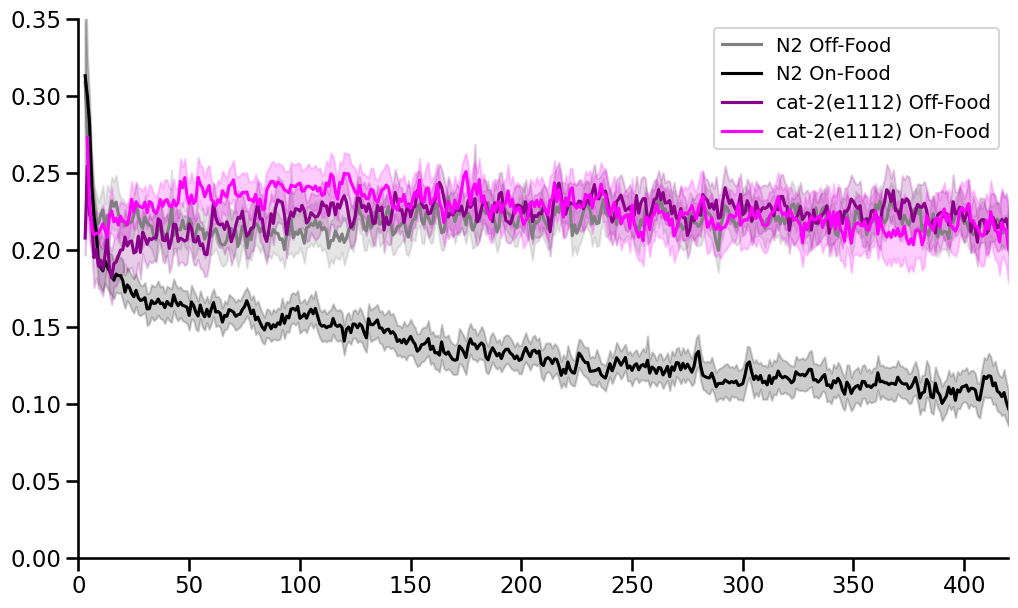

In [32]:
# Setting viewing range for your graph
top = 0.35
bottom = 0
left = 0
right = 420
xlabel = ""
ylabel = ""

sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(12,7))
plt.gca().xaxis.grid(False)
ax = sns.lineplot(x="time_bin", 
             y="speed", 
             data = TotalConcatenated,
             hue = 'Group',
             palette = ['grey',
                        'black',
                        '#8B008B',
                        '#FF00FF',
                        
                        # 'green',
                        # 'lightgreen',
                        # 'royalblue',
                        # 'lightblue',
                        # '#FFB5C5',
                        # '#CD6889',
                        # 'maroon',
                        # 'firebrick'
                       ])
plt.xlabel(xlabel)
plt.ylabel(ylabel)
# plt.title("Speed Trace")
plt.ylim(top = top)
plt.ylim(bottom = bottom)
plt.xlim(left= left)
plt.xlim(right = right)
ax.legend(loc = 'upper right', fontsize = '14')
sns.despine()
plt.savefig(f'Speed_Trace_{left}to{right}s.png', format='png', dpi=450, bbox_inches='tight')
plt.show()

# BSR bar plot (differences of differences)

Calculates worm speed average over designated time period

In [33]:
TotalConcatenated['Genotype']

0                   N2
1                   N2
2                   N2
3                   N2
4                   N2
              ...     
209858    cat-2(e1112)
209859    cat-2(e1112)
209860    cat-2(e1112)
209861    cat-2(e1112)
209862    cat-2(e1112)
Name: Genotype, Length: 209863, dtype: object

In [34]:
# TotalConcatenated = pd.read_csv("/Users/Joseph/Desktop/BSR_baseline_output.csv")
# print(TotalConcatenated)
TotalConcatenated = TotalConcatenated.astype({'plate_id': int, 'worm':int, 'date':int})
# TotalConcatenated[['Genotype', 'Treatment']] = TotalConcatenated['Strain'].str.split('_', expand=True)
# TotalConcatenated['Gene'] = TotalConcatenated['Genotype'].str.split('(', expand=True)[0]
print(TotalConcatenated)

        time_bin  worm  plate_id      date        time     speed          x  \
0            3.0    80    100950  20231128    2.937500  0.273900  24.050550   
1            3.0   181    100950  20231128    2.991000  0.386600  29.022100   
2            3.0   324    100950  20231128    2.937500  0.277700  10.797050   
3            3.0   423    100950  20231128    2.937500  0.301400  27.258150   
4            3.0   675    100950  20231128    2.880333  0.302533  24.185100   
...          ...   ...       ...       ...         ...       ...        ...   
209858     420.0   939    100510  20231128  419.519667  0.008483  28.551083   
209859     420.0   957    100510  20231128  419.519667  0.229658  31.127358   
209860     420.0   975    114258  20231128  419.505556  0.316267  18.244589   
209861     420.0   987    104551  20231128  419.571500  0.241975  14.252750   
209862     420.0   993    113827  20231128  419.516313  0.293538  33.213300   

                y  angularspeed  pathlength       k

In [96]:
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 300]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= 400]
worm_chunkeddata_mean = chunkeddata.groupby(["Group","Genotype","Treatment","plate_id","date","worm"], as_index=False).mean()
print(worm_chunkeddata_mean)

                     Group      Genotype Treatment  plate_id      date  worm  \
0              N2 Off-Food            N2   OffFood    100950  20231128     6   
1              N2 Off-Food            N2   OffFood    100950  20231128    12   
2              N2 Off-Food            N2   OffFood    100950  20231128    21   
3              N2 Off-Food            N2   OffFood    100950  20231128    43   
4              N2 Off-Food            N2   OffFood    100950  20231128    62   
...                    ...           ...       ...       ...       ...   ...   
1273  cat-2(e1112) On-Food  cat-2(e1112)    OnFood    114258  20231128   962   
1274  cat-2(e1112) On-Food  cat-2(e1112)    OnFood    114258  20231128   975   
1275  cat-2(e1112) On-Food  cat-2(e1112)    OnFood    114258  20231128   977   
1276  cat-2(e1112) On-Food  cat-2(e1112)    OnFood    114258  20231128   985   
1277  cat-2(e1112) On-Food  cat-2(e1112)    OnFood    114258  20231128   986   

      time_bin        time     speed   

In [ ]:
worm_chunkeddata_mean.to_csv("/Users/Joseph/Desktop/BSR_LRRK2Model_data_by_worm.csv")

# Done

In [40]:
worm_chunkeddata_mean

,Group,Genotype,Treatment,plate_id,date,worm,time_bin,time,speed,x,y,angularspeed,pathlength,kink,bias,curve,dir,crab,length,midline,width,morphwidth,area
0,N2 Off-Food,N2,OffFood,100950,20231128,1,86.0,85.491346,0.163853,42.235545,27.472277,12.505545,2.437652,63.176038,0.964158,33.939928,0.002044,0.016078,0.867907,1.063143,0.254191,0.104520,0.109465
1,N2 Off-Food,N2,OffFood,100950,20231128,2,41.0,40.498766,0.233766,42.237906,25.630574,22.656951,0.643140,57.317147,0.301685,42.791856,0.013951,0.033406,0.706303,0.954128,0.266525,0.105476,0.091720
2,N2 Off-Food,N2,OffFood,100950,20231128,6,335.5,335.000940,0.174916,18.261616,25.428573,18.070274,5.202714,59.094576,0.578447,38.791145,0.006518,0.021817,0.787107,1.002261,0.259783,0.113483,0.105355
3,N2 Off-Food,N2,OffFood,100950,20231128,7,128.0,127.507367,0.243514,14.622932,16.744851,20.222904,6.049838,59.768871,0.203002,39.023554,0.010776,0.030023,0.859507,1.093979,0.274891,0.127605,0.128269
4,N2 Off-Food,N2,OffFood,100950,20231128,8,14.5,14.021508,0.220896,35.723321,17.780027,23.996086,2.474376,65.180417,0.949495,42.095101,0.008543,0.029365,0.779543,1.018573,0.278792,0.103811,0.099204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3902,cat-2(e1112) On-Food,cat-2(e1112),OnFood,114258,20231128,985,361.0,360.503386,0.257455,29.498782,18.061777,24.876002,7.670511,53.536539,0.984973,35.607013,0.006298,0.031996,0.790745,1.032732,0.295244,0.123892,0.118936
3903,cat-2(e1112) On-Food,cat-2(e1112),OnFood,114258,20231128,986,359.0,358.496505,0.240971,7.146695,37.454735,17.792082,4.031505,56.922503,0.787736,37.031345,0.006510,0.031987,0.911449,1.123475,0.271441,0.152281,0.153502
3904,cat-2(e1112) On-Food,cat-2(e1112),OnFood,114258,20231128,990,244.5,243.995444,0.247241,10.052090,29.672701,12.832652,4.004297,42.836305,0.965278,34.765891,0.000820,0.026112,0.983779,1.192522,0.245485,0.150957,0.156821
3905,cat-2(e1112) On-Food,cat-2(e1112),OnFood,114258,20231128,997,280.5,280.000268,0.187836,17.237460,32.218140,15.833664,1.537533,66.510491,0.695602,36.539616,0.012709,0.026217,0.858475,1.088133,0.286057,0.141987,0.136942


In [97]:
# worm_chunkeddata_mean[['Genotype', 'Treatment']] = worm_chunkeddata_mean['Group'].str.split('_', expand=True)
worm_chunkeddata_mean = worm_chunkeddata_mean.rename(columns={'Genotype':'Gene'})
worm_avg_speed = worm_chunkeddata_mean[['Gene', 'Treatment', 'speed']]
# worm_avg_speed = worm_avg_speed.rename(columns={'Genotype':'Gene'})
# worm_avg_speed = chunkeddata_mean[['Gene', 'Treatment', 'bias']]
avg_speed = worm_avg_speed.groupby(["Gene", 'Treatment'], as_index=False).mean()
print(avg_speed)
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")
speed_diff = avg_speed.drop(columns=["Treatment"]).groupby("Gene", as_index=False).diff(periods=-1).dropna()
print("-"*40)
print(speed_diff)
# speed_diff.to_csv("speed_diff.csv")
speed_diff.reset_index(drop=False).dropna()
speed_diff.insert(loc=0, column='Gene', value=avg_speed['Gene'])
speed_diff=speed_diff.sort_values(by=["speed"])
# speed_diff=speed_diff.sort_values(by=["bias"])
# speed_diff=speed_diff.reset_index(drop=True).dropna()
print(speed_diff)
print(speed_diff.iloc[1,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[1,1]
speed_diff=speed_diff.sort_values(by=["Score"])
print(speed_diff)

           Gene Treatment     speed
0            N2   OffFood  0.221109
1            N2    OnFood  0.120767
2  cat-2(e1112)   OffFood  0.232887
3  cat-2(e1112)    OnFood  0.232002
----------------------------------------
      speed
0  0.100342
2  0.000885
           Gene     speed
2  cat-2(e1112)  0.000885
0            N2  0.100342
0.10034171059598254
           Gene     speed     Score
2  cat-2(e1112)  0.000885 -0.099457
0            N2  0.100342  0.000000


In [51]:
Gene_Orthology=pd.read_csv('/Users/Joseph/Desktop/Gene_Orthology.csv')
Gene_Orthology=Gene_Orthology.rename(columns={"Gene":"Orthology", "Worm Gene":"Gene"}).drop(columns=["Unnamed: 0"])
print(Gene_Orthology)

         Orthology    Gene Human Gene Category
0      KCNS3•kvs-5   kvs-5      KCNS3     GWAS
1      LAMB2•lam-1   lam-1      LAMB2     GWAS
2        GBA•gba-4   gba-4        GBA     GWAS
3     MCCC1•mccc-1  mccc-1      MCCC1     GWAS
4    CAMK2D•unc-43  unc-43     CAMK2D     GWAS
..             ...     ...        ...      ...
119  PLA2G6•ipla-3  ipla-3     PLA2G6     PARK
120  KIF21B•klp-12  klp-12     KIF21B     GWAS
121   ZRANB3•csb-1   csb-1     ZRANB3     GWAS
122   SYNJ1•unc-26  unc-26      SYNJ1     PARK
123   GIGYF2•gyf-1   gyf-1     GIGYF2     PARK

[124 rows x 4 columns]


In [53]:
speed_diff=pd.merge(speed_diff,
                     Gene_Orthology,
                     on='Gene',
                     how='left')
speed_diff=speed_diff.rename(columns={"Gene":"Worm Gene", "Orthology":"Gene"})
print(speed_diff)

  Worm Gene     speed  Score Worm Gene Human Gene_x    Category_x Gene  \
0        N2  0.070582    0.0     WT•N2           WT  CONTROL (WT)  NaN   

  Human Gene_y Category_y  
0          NaN        NaN  


# Stats stuff from here..?

In [101]:
worm_avg_speed

,Gene,Treatment,speed
0,N2,OffFood,0.185809
1,N2,OffFood,0.230192
2,N2,OffFood,0.158205
3,N2,OffFood,0.255050
4,N2,OffFood,0.213172
...,...,...,...
1273,cat-2(e1112),OnFood,0.249877
1274,cat-2(e1112),OnFood,0.279306
1275,cat-2(e1112),OnFood,0.304823
1276,cat-2(e1112),OnFood,0.257455


In [ ]:
worm_avg_speed.anova(dv="speed", between=["Gene","Treatment"])

,Source,SS,DF,MS,F,p-unc,np2
0,Gene,1.058970,1.0,1.058970,394.580052,1.045058e-76,0.236477
1,Treatment,0.740456,1.0,0.740456,275.899630,3.104826e-56,0.178011
2,Gene * Treatment,0.783301,1.0,0.783301,291.863922,4.438129e-59,0.186392
3,Residual,3.419148,1274.0,0.002684,NaN,NaN,NaN


In [ ]:
df1 = speed_diff[speed_diff.isna().any(axis=1)]
df1

In [95]:
start = 300 #<----- set the start time of the range
point = 400 #<------- set the end time of your range
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Group","worm","plate_id","date"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Group'].str.split('_', expand=True)
worm_avg_speed = chunkeddata_mean[['Genotype', 'Treatment', 'Group', 'speed']]
avg_speed = worm_avg_speed.groupby(["Group", 'Treatment', 'Genotype'], as_index=False).mean()
print(avg_speed)
# print(avg_speed)

# avg_speed.to_csv("avg_speed.csv")

speed_diff = avg_speed.drop(columns=["Group", "Treatment"]).groupby("Genotype", as_index=False).diff(periods=-1)
# print(speed_diff)
# speed_diff.to_csv("speed_diff.csv")
speed_diff.reset_index(drop=False)
speed_diff.insert(loc=0, column='Genotype', value=avg_speed['Genotype'])
speed_diff=speed_diff.reset_index(drop=True).dropna()
print(speed_diff)
# print(speed_diff.iloc[1,1])
speed_diff['Score']=speed_diff['speed']-speed_diff.iloc[1,1]
speed_diff=speed_diff.sort_values(by=["Score"])
print(speed_diff)

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
print(speed_diff.iloc[0,1])

In [ ]:
avg_speed["new"] = range(1,len(avg_speed)+1)
avg_speed.loc[avg_speed.index==4, 'new'] = 0
avg_speed.loc[avg_speed.index==4, 'new'] = 0
print(avg_speed)
# avg_speed.sort_values("new").drop('new', axis=1)

## Making the bar plot

/var/folders/31/jpj6mpsx60d9829cymplqfsh0000gn/T/ipykernel_62215/3120014771.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['cat-2','N2'], fontsize=30)


<Figure size 640x480 with 0 Axes>

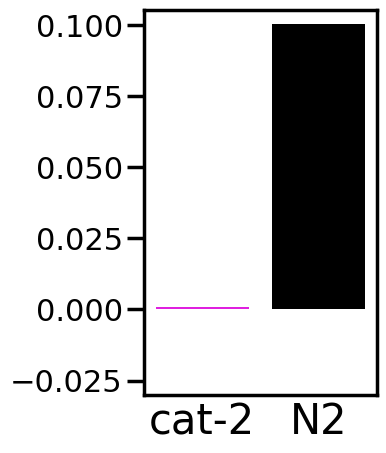

In [98]:
Title = "" #<---------------- Input Here -----------------
FileName = "BSR_bar"
sns.set_context("poster")
plt.figure(linewidth = 2)
plt.figure(figsize=(3, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Gene", 
             y = 'speed', 
             data = speed_diff.sort_values(by=["speed"]), #<--------------- Input Here -------------
             hue = 'Gene',
             palette= ['#FF00FF','black'],
             legend=False,
             hue_order = ['cat-2(e1112)','N2']
            #  edgecolor="DodgerBlue",
            #  linewidth = 2.5,
#              seed=5,
#              ci = 95, # 'sd' for SD, '68' for SEM
#              palette = ['grey',
#                         'black'
#                        ]
                )
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylabel("")
# plt.ylim(top = 0.1)
plt.ylim(bottom = -0.03)
plt.title(Title)
# ax.legend(fontsize = '14', frameon=True)
ax.tick_params(axis='x',length=1)
ax.set_xticklabels(['cat-2','N2'], fontsize=30)
# ax.set_xticks(labels=['cat-2','N2'])
# plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{FileName}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [57]:
speed_diff

,Gene,speed,Score
2,cat-2(e1112),-0.005430,-0.076012
0,N2,0.070582,0.000000


# 8.3 Graphing Bar Graphs

# Speed Barplots Comparison

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----

start = 300
point = 400
var = "area"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]
chunkeddata_mean = chunkeddata.groupby(["Strain","worm"], as_index=False).mean()
chunkeddata_mean[['Genotype', 'Treatment']] = chunkeddata_mean['Strain'].str.split(' - ', 1, expand=True)

Title = f"{var} - {start}-{point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata_mean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
# Test Cell
# chunkeddata_mean

In [ ]:
# Test Cell
# TotalConcatenated.describe()
# chunkeddata0
# chunkeddata

# Bias Barplots Comparison

In [ ]:
point = 420
var = "bias"
chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= point]

Title = f"{var} - First {point} seconds" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 5))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = chunkeddata, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
             ci = None,
             palette = ['black',
                        'grey'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

# Dispersion Plot (starburst) - *Not Functional In Current Iteration

In [ ]:
timepoint=60 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= 0]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"0 - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True) #<--------------------------
g.map_dataframe(sns.scatterplot, "x_0", "y_0", hue="time", palette = "YlOrBr", linewidth=0, alpha=0.7, s=2)
g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f"{Title} Dispersion map", y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Dispersion map.png', format='png', dpi=900, bbox_inches = 'tight')

# Total Distance Traveled Trace - *Not Functional In Current Iteration

In [ ]:
start=50
timepoint=420 # <---------------------- indicate end timepoint


chunkeddata0 = TotalConcatenated[TotalConcatenated["time"] >= start]
chunkeddata = chunkeddata0[chunkeddata0["time"] <= timepoint]

Title = f"{start} - {timepoint} seconds" #<--------------------
sns.set(context="talk")
# sns.set_context("talk", fontscale=0.5)
plt.figure(linewidth = 2.5)
plt.figure(figsize=(16, 4))
g = sns.FacetGrid(chunkeddata, row = "Treatment", col = "Genotype", margin_titles=True, ylim=[0,15]) #<---- set y-lim
g.map_dataframe(sns.scatterplot, "time", "distance", hue="worm", palette = "colorblind", linewidth=0, alpha=0.7, s=2)
# g.set_axis_labels("x position", "y position")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
# g.fig.subplots_adjust(top=0.8)
g.fig.suptitle(f'{Title} Total Distance Traveled Trace', y=1.05)
g.tight_layout()
# plt.savefig(f'{Title} Total Distance Traveled Trace.png', format='png', dpi=900, bbox_inches = 'tight')

# Done!

In [ ]:
AfterOneHundredSecs = TotalConcatenated[TotalConcatenated["time_bin"] >= 100].reset_index(drop=True)
print(AfterOneHundredSecs)

In [ ]:
AfterOneHundredMean = AfterOneHundredSecs.groupby(["Strain", "worm", "Genotype", "Treatment"], as_index=False).mean()
print(AfterOneHundredMean)

In [ ]:
# Valid Measurement inputs(change var)
# 1:'speed', <---
# 2: "x",
# 3: "y",
# 4: "angularspeed", <-----
# 5: "pathlength",
# 6: "kink",  <---
# 7: "bias", <----
# 8: "curve", <---
# 9: "dir",<----
# 10: "crab",<----
# 11: "length",<---
# 12: "midline",<----
# 13: "width",<----
# 14: "morphwidth",<----
# 15: "area"<----


var = "speed"

Title = f"{var}" #<---------------- Input Here -----------------
sns.set_context("talk")
plt.figure(linewidth = 2.5)
plt.figure(figsize=(15, 3))
plt.gca().xaxis.grid(False)
ax = sns.barplot(x="Genotype", 
             y = var, 
             data = AfterOneHundredMean, #<--------------- Input Here -------------
             hue = 'Treatment',
             edgecolor="black",
             linewidth = 2.5,
#              seed=5,
             ci = 95, # 'sd' for SD, '68' for SEM
             palette = ['grey',
                        'black'
                       ]
                )
plt.xlabel("Strain and Condition")
# plt.ylabel("Average Speed (mm/s)")
plt.title(Title)
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
# plt.savefig(f'{Title}.png', format='png', dpi=450, bbox_inches = 'tight')
plt.show()

In [ ]:
AfterOneHundredCAT.anova(dv="speed", between=["Genotype","Treatment"])

In [ ]:
AfterOneHundredTEST.anova(dv="speed", between=["Genotype","Treatment"]).round(7)